<!DOCTYPE html>
<html>
<body>
    <h1 style="text-align: center;">
        <strong>⚛️Explicable AI: Superconductivity data</strong>
    </h1>
</body>
</html>


<!DOCTYPE html>
<html>
<body>
    <h3 style="text-align: center;">
     📈 <strong> Linear Regression & Feature Importance </strong>
    </h3>
</body>
</html>

<!DOCTYPE html>
<html>
<body>
    <h3>
        <strong>📚Importing Libraries</strong>
    </h3>
</body>
</html>

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.api as sm
from scipy.stats import f
from scipy.stats import expon

from pygam import GAM, s, te, f


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFECV 
from sklearn.linear_model import LinearRegression

***

<!DOCTYPE html>
<html>
<body>
    <h3>
        <strong>🏋🏻Training the model: OLS</strong>
    </h3>
</body>
</html>

A linear regression can be write as:

$$
y = \beta_0 + \beta_1 x_1 + \cdots + \beta_n x_n + \epsilon
$$

where:
* $\beta_0$: Intercept
* $\beta_i$: Coefficients
* $\epsilon$: Error

The ideal weight for each coefficient is estimed using the Ordinary Least Squares (OLS):

$$
\hat{B} = arg min_{\beta_0, \cdots, \beta_p} \sum_{i=i}^{n} (y^{(i)} - (\beta_0 + \sum_{j=1}^{p} B_j X_j^{(i)}))^2
$$

In [4]:
df = pd.read_csv("dataset_condutividade.csv", sep=';')
display(df)

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                       4         88.944468             57.862692   
1                       5         92.729214             58.518416   
2                       4         88.944468             57.885242   
3                       4         88.944468             57.873967   
4                       4         88.944468             57.840143   
...                   ...               ...                   ...   
21258                   4        106.957877             53.095769   
21259                   5         92.266740             49.021367   
21260                   2         99.663190             95.609104   
21261                   2         99.663190             97.095602   
21262                   3         87.468333             86.858500   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0              66.361592              36.116612             1.181795   
1              73.132787              36.396602             1.449309   
2              66.361592              36.122509             1.181795   
3              66.361592              36.119560             1.181795   
4              66.361592              36.110716             1.181795   
...                  ...                    ...                  ...   
21258          82.515384              43.135565             1.177145   
21259          64.812662              32.867748             1.323287   
21260          99.433882              95.464320             0.690847   
21261          99.433882              96.901083             0.690847   
21262          82.555758              80.458722             1.041270   

       wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                     1.062396          122.90607              31.794921   
1                     1.057755          122.90607              36.161939   
2                     0.975980          122.90607              35.741099   
3                     1.022291          122.90607              33.768010   
4                     1.129224          122.90607              27.848743   
...                        ...                ...                    ...   
21258                 1.254119          146.88130              15.504479   
21259                 1.571630          188.38390               7.353333   
21260                 0.530198           13.51362              53.041104   
21261                 0.640883           13.51362              31.115202   
21262                 0.895229           71.75500              43.144000   

       std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  \
0            51.968828  ...          2.257143       2.213364   
1            47.094633  ...          2.257143       1.888175   
2            51.968828  ...          2.271429       2.213364   
3            51.968828  ...          2.264286       2.213364   
4            51.968828  ...          2.242857       2.213364   
...                ...  ...               ...            ...   
21258        65.764081  ...          3.555556       3.223710   
21259        69.232655  ...          2.047619       2.168944   
21260         6.756810  ...          4.800000       4.472136   
21261         6.756810  ...          4.690000       4.472136   
21262        29.905282  ...          4.500000       4.762203   

       wtd_gmean_Valence  entropy_Valence  wtd_entropy_Valence  range_Valence  \
0               2.219783         1.368922             1.066221              1   
1               2.210679         1.557113             1.047221              2   
2               2.232679         1.368922             1.029175              1   
3               2.226222         1.368922             1.048834              1   
4               2.206963         1.368922             1.096052              1   
...                  ...              ...                  ...            ...   
21258           3.519911         1.377820             0.913658  

In [5]:
X = df.drop(["critical_temp"], axis=1)
y = df["critical_temp"]

In [6]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.9, random_state=1702)

In [5]:
model = sm.OLS(y_train, X_train)

lr = model.fit()

In [6]:
y_predicted = lr.predict(X_test)

***

<!DOCTYPE html>
<html>
<body>
    <h3>
        <strong>🧪Interpretation methods</strong>
    </h3>
</body>
</html>

**Summary**

In [7]:
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:          critical_temp   R-squared (uncentered):                   0.869
Model:                            OLS   Adj. R-squared (uncentered):              0.869
Method:                 Least Squares   F-statistic:                              1563.
Date:                Thu, 27 Feb 2025   Prob (F-statistic):                        0.00
Time:                        13:36:49   Log-Likelihood:                         -82020.
No. Observations:               19137   AIC:                                  1.642e+05
Df Residuals:                   19056   BIC:                                  1.648e+05
Df Model:                          81                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

**Analysis of Residuals**

In [8]:
residuals = y_test - y_predicted

In [9]:
d_residuals = {
    "Real Value": y_test,
    "Predicted Value": y_predicted,
    "Residuals": residuals
}
df_residuals = pd.DataFrame.from_dict(d_residuals)
display(df_residuals)

Real Value  Predicted Value  Residuals
7112       62.000        64.178622  -2.178622
4456       57.400        56.803166   0.596834
1943       59.000        63.681013  -4.681013
8853       10.200        25.710996 -15.510996
21215       6.200        11.803964  -5.603964
...           ...              ...        ...
7270       58.500        68.445392  -9.945392
21168       2.100         1.160350   0.939650
13381       4.505        16.873915 -12.368915
6874       17.000        30.964254 -13.964254
7364       80.000        62.915295  17.084705

[2126 rows x 3 columns]

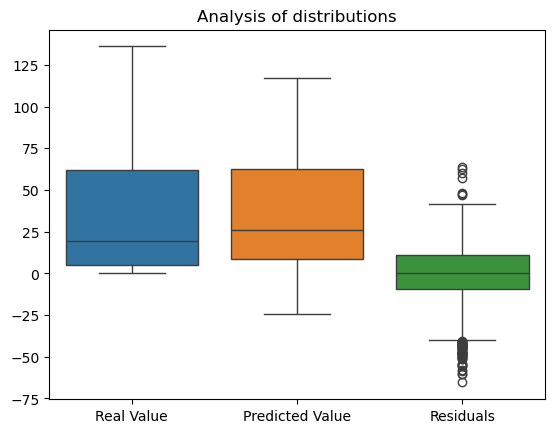

In [10]:
sns.boxplot(df_residuals);
plt.title("Analysis of distributions")
plt.show()

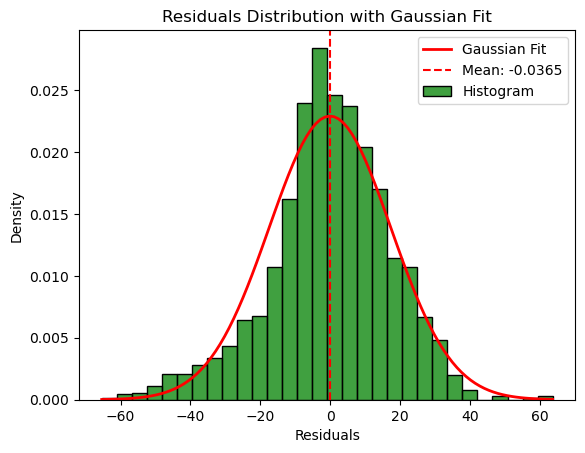

In [11]:
eixo = sns.histplot(df_residuals["Residuals"], color='green', stat="density", bins=30, label="Histogram")

mean = np.mean(df_residuals["Residuals"])
std_dev = np.std(df_residuals["Residuals"], ddof=1) 

x = np.linspace(min(df_residuals["Residuals"]), max(df_residuals["Residuals"]), 100)

pdf_fitted = stats.norm.pdf(x, loc=mean, scale=std_dev)

plt.plot(x, pdf_fitted, 'r-', lw=2, label="Gaussian Fit")

plt.axvline(mean, color='r', linestyle='dashed', label=f'Mean: {round(mean, 4)}')

plt.legend()
plt.title("Residuals Distribution with Gaussian Fit")
plt.xlabel("Residuals")
plt.ylabel("Density")

plt.show()


* The means of the real and predicted values are similar. Furthermore, the mean of the residuals is close to 0, indicating that the model is not overfitting (more random error).
* Comparing the real values with the predicted values, it is possible to say that the distributions between the second and third quartiles are similar.
* Real values exhibit greater range for higher temperatures, while in the predicted values, the first and fourth quartiles have closer sizes (There are negative temperature values).
* There are some outliers in the residuals, likely related to higher temperature values, which were not fully captured by the linear model. However, as expected, the residual distribution follows a normal distribution, with mean equal to 0.

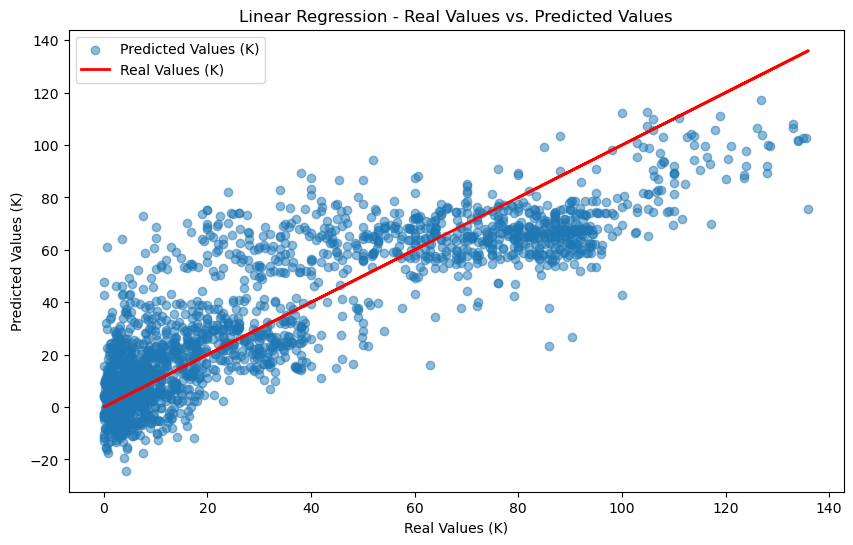

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predicted, alpha=0.5, label='Predicted Values (K)')

plt.plot(y_test, y_test, color='red', label='Real Values (K)', linewidth=2)

plt.title('Linear Regression - Real Values vs. Predicted Values')
plt.xlabel('Real Values (K)')
plt.ylabel('Predicted Values (K)')
plt.legend()
plt.show()

* A noticeable pattern appears in the plot, particularly in the 60-80 K range of predicted values, suggesting a possible case of underfitting. Probably, a simple linear model can´t capture the data complexity.

In [13]:
array_residuals = np.array(residuals)

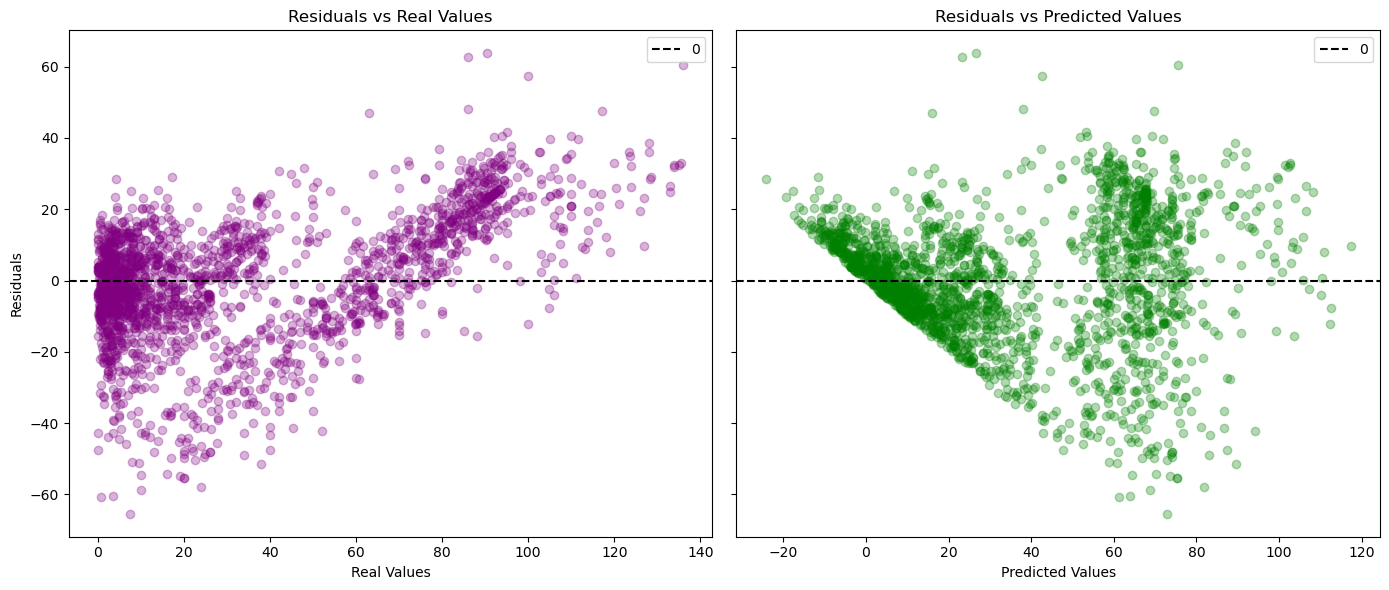

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

x_real = np.array(df_residuals["Real Value"])
x_pred = np.array(df_residuals["Predicted Value"])

axs[0].scatter(x_real, array_residuals, alpha=0.3, color='purple')
axs[0].set_title("Residuals vs Real Values")
axs[0].set_xlabel("Real Values")
axs[0].set_ylabel("Residuals")

axs[1].scatter(x_pred, array_residuals, alpha=0.3, color='green')
axs[1].set_title("Residuals vs Predicted Values")
axs[1].set_xlabel("Predicted Values")

axs[0].axhline(0, color="black", ls="--", label="0")
axs[1].axhline(0, color="black", ls="--", label="0")

axs[0].legend()
axs[1].legend()

plt.tight_layout()
plt.show()


There is a high concentration of instances around 0 K, where the model performs reasonably well, with most residuals ranging between -20 K and 20 K. However, as the real values increase (above 20 K), the residuals follow a linear trend, where both positive and negative errors grow proportionally. This suggests that the model underestimates high values and overestimates low values, indicating heteroscedasticity (the variability of the residuals increases with the predicted values).

In the second plot, for predicted values below 0, a linear pattern is observed, which is consistent with the fact that negative values do not exist in the dataset. In addition, between 60 K and 80 K, there is a high density of points, suggesting that the model struggles to capture the actual variation in this range, possibly due to an overly simplified relationship between variables.

**Analysis of Variance (ANOVA)**

$$
SSR = \sum_{i=1}^{n} (\hat{y}^{(i)} - \overline{y})^2
$$

$$
SSE = \sum_{i=1}^{n} (y^{(i)} - \hat{y}^{(i)})^2
$$

$$
SST = \sum_{i=1}^{n} (y^{(i)} - \overline{y})^2
$$

where:
* $ y^{(i)}$: Real value
* $ \hat{y}^{(i)}$: Predicted value
* $\overline{y}$: Data mean
* SSE: squared sum of the error terms
* SST: squared sum of the data variance

*F test*: Check how much of the variability in Y can be explained by the model and how much can be attributed to the effect of random error. In a nutshell, it can be used to verify if at least one of the independent variables in the model has a significant effect on the dependent variable.

* $h_0$: $B_i = 0, \forall{1, 2 ... 81}$
* $h_1: B_i \neq 0$

If $h_0$ is not rejected, we can say that there is no linear relationship between X and Y.

In [15]:
significance = 0.05

In [16]:
def SSE(y_test, y_predicted): # Sum of Squares Error
    sse = 0
    for i, j in zip(y_test, y_predicted):
        sse += (i - j) ** 2
    return sse

def SST(y_train): # Sum of Squares Total
    mean_y = np.mean(y_train)  
    sst = 0
    for i in y_train:
        sst += (i - mean_y) ** 2  
    return sst

def SSR(y_train, y_predicted):  # Sum of Squares Regression
    mean_y = np.mean(y_train)  
    ssr = 0
    for i, j in zip(y_train, y_predicted):
        ssr += (j - mean_y) ** 2  
    return ssr

In [17]:
y_train_predicted = lr.predict(X_train)

In [18]:
ssr = SSR(y_train, y_train_predicted)
sst = SST(y_train) 
sse = SSE(y_train, y_train_predicted)

p = len(df.drop(["critical_temp"], axis=1).columns)
n = len(y_test)

In [19]:
anova = {
    "Degrees of freedom": [p, (n- p -1), n-1],
    "Sum of squares": [ssr, sse, sst],
    "Mean Square": [ssr/p, (sse/(n- p - 1)), sst/(n-1)],
    "F test": [((ssr / p) / (sse / (n - p - 1))), "-", "-"],
}

df_anova = pd.DataFrame.from_dict(anova)
df_anova.index = ["Regression", "Residuals", "Total"]
display(df_anova)

Degrees of freedom  Sum of squares    Mean Square     F test
Regression                  81    1.655738e+07  204412.145269  70.613164
Residuals                 2044    5.917005e+06    2894.816403          -
Total                     2125    2.249195e+07   10584.446925          -

Based on the test result, considering the degrees of freedom of the numerator and denominator, to find the p-value, it is necessary to check whether the test F value lies within the rejection area of the hypothesis, corresponding to 5% of the distribution. This can be done by calculating the cumulative distribution function of the F distribution, that gives the probability that variable X is less than or equal to x.

In [20]:
from scipy.stats import f 
p_value = 1 - f.cdf(((ssr / p) / (sse / (n - p - 1))), p, (n- p -1))
print(f"p-value is {p_value:.4}")
if p_value < significance:
    print(f"h_0 can be rejected")
else:
    print(f"h_0 can´t be rejected")

p-value is 1.11e-16
h_0 can be rejected


**R squared**

**${R^2}$** (Coefficient of determination): The proportion of the total variance in the target variable that is explained by the model. It can be calculated by two differente ways, depending if the model has or not intercept. 

With intercept:

$$
R^2 = 1 - \frac{SSE}{SST}
$$

Without intercept:

$$
R^2 = 1 - \frac{SSE}{\sum_{i=1}^{n} (y^{(i)})^2}
$$

Considering that the OLS model has no intercept, it is possible to calculate the r squared with the second formula.

In [21]:
def r_squared(SSE, y_test):
    return 1 - (sse/ sum(([i**2 for i in y_test])))

In [22]:
r_squared = r_squared(sse, y_train)

In [23]:
print(f"The R-squared of the model is {r_squared:.4f}") 

The R-squared of the model is 0.8692


The same result can be obtained by the rsquared method of statsmodel.

In [24]:
print(f"The R-squared of the model is {lr.rsquared:.4f}") 

The R-squared of the model is 0.8692


**Feature Importance**

Absolute value of a t-statistic, it is useful to evaluate the statistic significance of each feature. 

$$
t_{\beta_n} = \frac{\beta_n}{\mathrm{SE}(\beta_n)}
$$
where:
* $\beta_n$:  estimated weight scaled (The bigger, the more important)
* $\mathrm{SE}(\beta_n)$: coefficient standard error (The smaller, the more important)


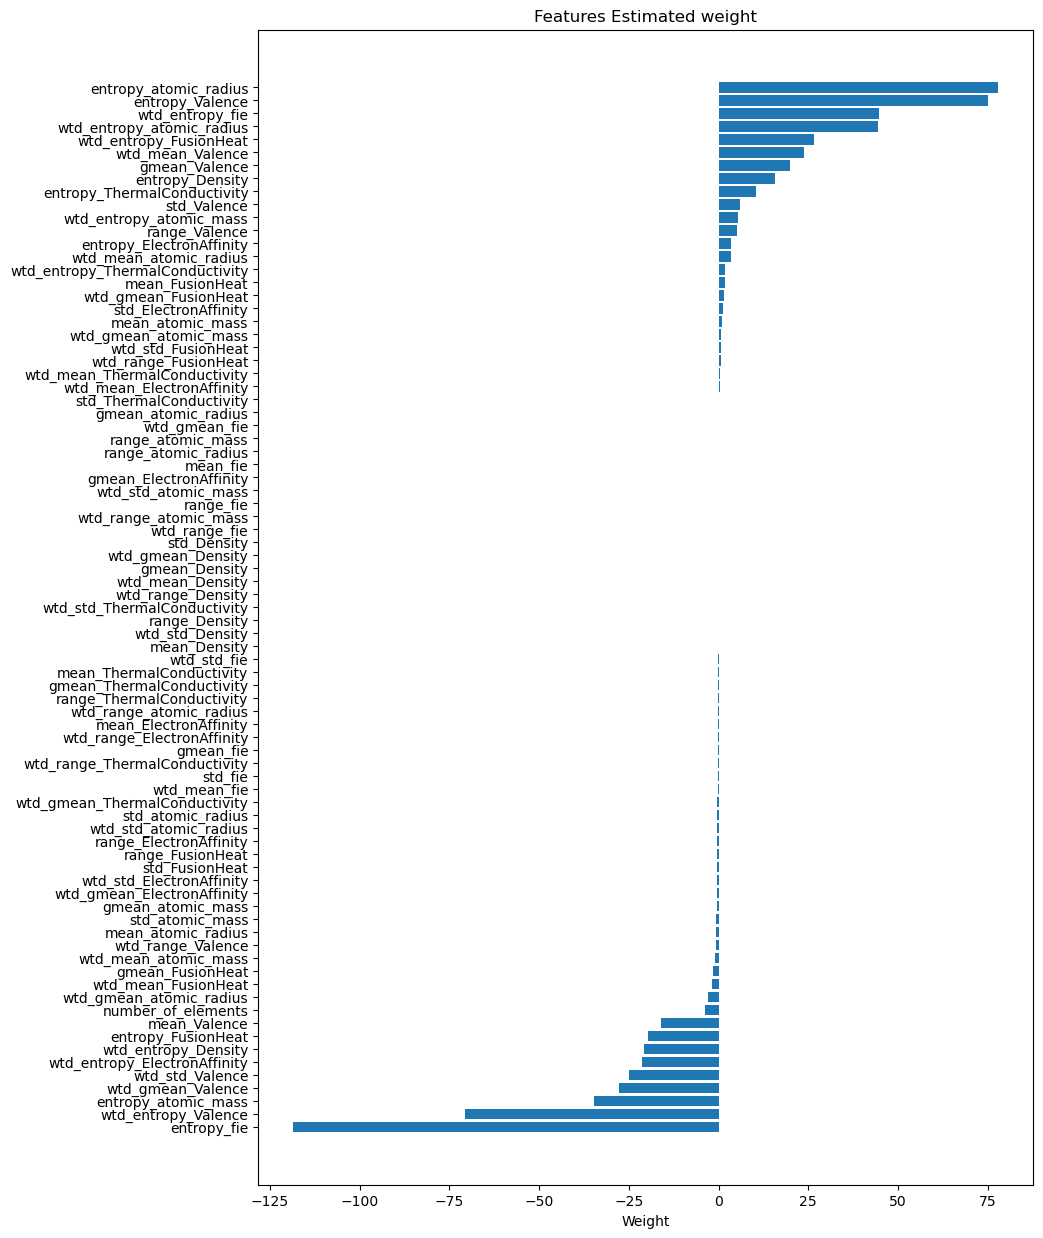

In [25]:
df_weights = pd.DataFrame({
    'Feature': lr.params.index,
    'Coefficient': np.array(lr.params)
})

df_weights = df_weights.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 15))
plt.barh(df_weights['Feature'], df_weights['Coefficient'])
plt.xlabel('Weight')
plt.title('Features Estimated weight')
plt.gca().invert_yaxis() 
plt.show()

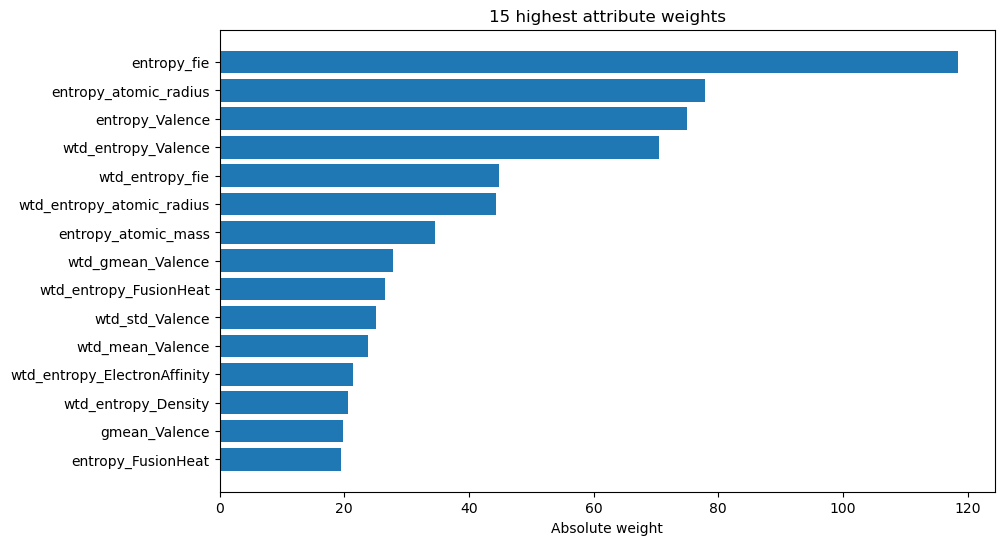

In [26]:
df_weights_abs = pd.DataFrame({
    'Feature': lr.params.index,
    'Coefficient': np.array(abs(lr.params))
})

df_weights_abs = df_weights_abs.sort_values(by='Coefficient', ascending=False)
df_weights_abs_15 = df_weights_abs[:15]

plt.figure(figsize=(10, 6))
plt.barh(df_weights_abs_15['Feature'], df_weights_abs_15['Coefficient'])
plt.xlabel('Absolute weight')
plt.title('15 highest attribute weights')
plt.gca().invert_yaxis() 
plt.show()

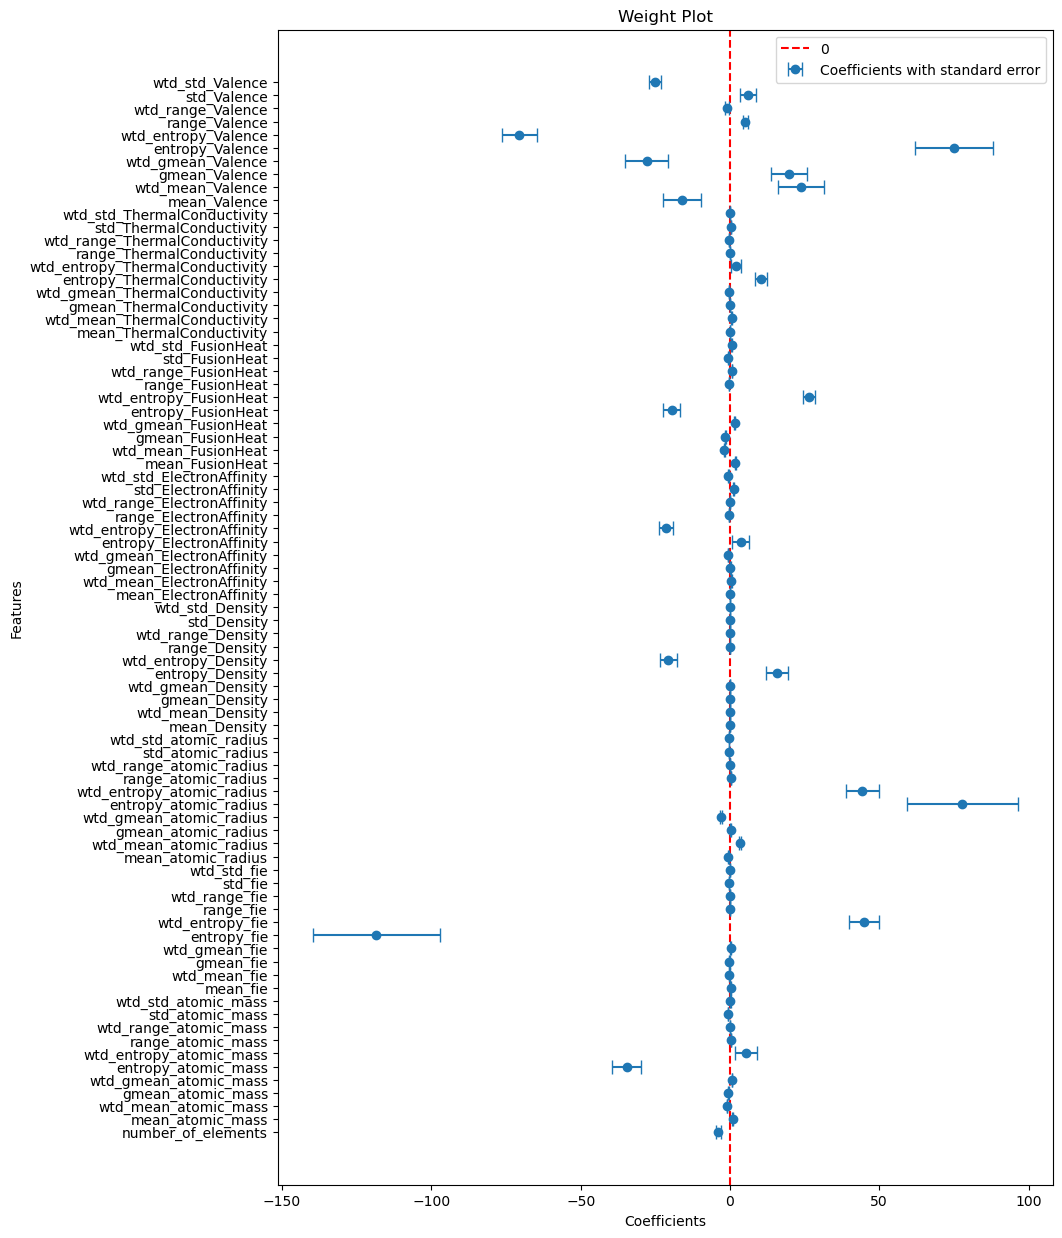

In [27]:
x = np.array(lr.params)  
y = lr.params.index
error = np.array(lr.bse) 

plt.figure(figsize=(10, 15))
plt.axvline(0, color='r', linestyle='dashed', label="0")
plt.errorbar(x, y, xerr=error, fmt="o", capsize=5, label ="Coefficients with standard error")
plt.legend()
plt.xlabel('Coefficients')
plt.ylabel('Features')
plt.title('Weight Plot')
plt.show()


* The largest coefficients have the largest errors

In [28]:
bn = np.array(lr.params)
se_bn = np.array(lr.bse)

In [29]:
feature_importance = bn/se_bn

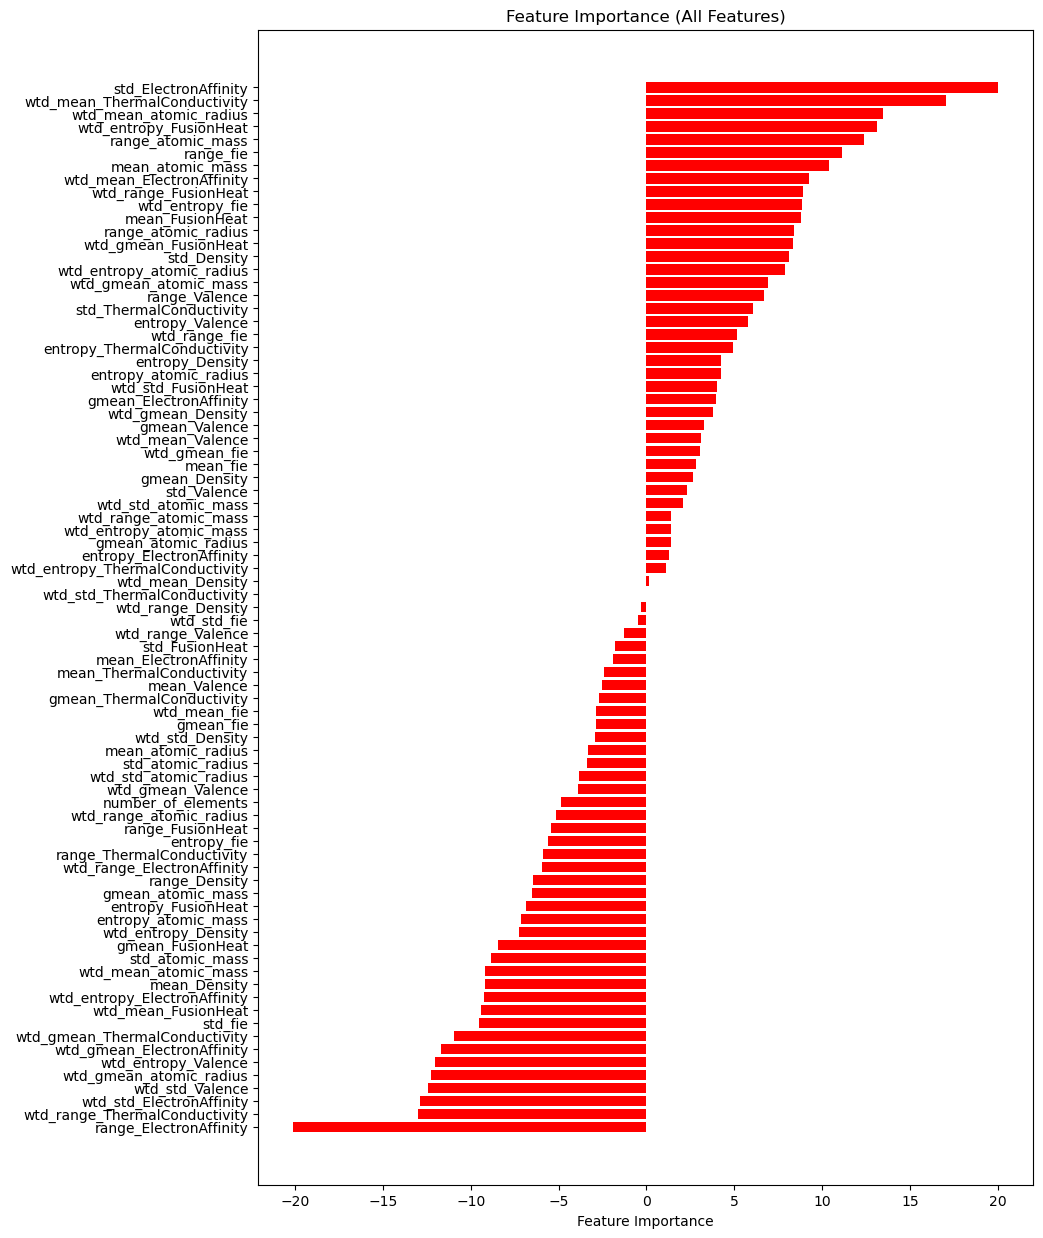

In [30]:
df_feature_importance = pd.DataFrame({
    'Feature': lr.params.index,
    'Feature Importance': np.array(feature_importance)
})

df_feature_importance= df_feature_importance.sort_values(by='Feature Importance', ascending=False)

plt.figure(figsize=(10, 15))
plt.barh(df_feature_importance['Feature'], df_feature_importance['Feature Importance'], color="red")
plt.xlabel('Feature Importance')
plt.title('Feature Importance (All Features)')
plt.gca().invert_yaxis() 
plt.show()

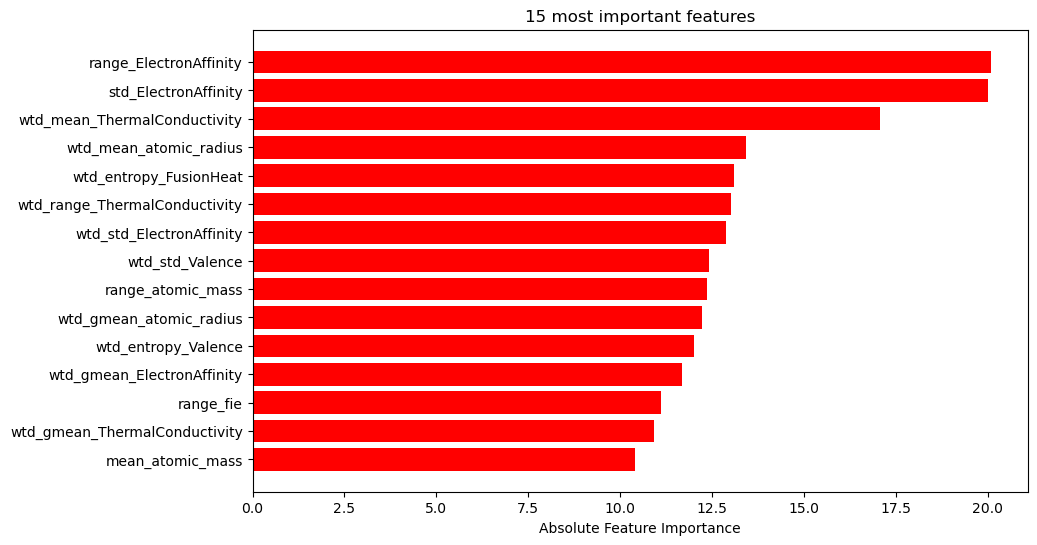

In [31]:
df_feature_importance_abs = pd.DataFrame({
    'Feature': lr.params.index,
    'Feature Importance': np.array(abs(feature_importance))
})

df_feature_importance_abs = df_feature_importance_abs.sort_values(by='Feature Importance', ascending=False)
df_feature_importance_abs_15 = df_feature_importance_abs[:15]


plt.figure(figsize=(10, 6))
plt.barh(df_feature_importance_abs_15['Feature'], df_feature_importance_abs_15['Feature Importance'], color="red")
plt.xlabel('Absolute Feature Importance')
plt.title('15 most important features')
plt.gca().invert_yaxis() 
plt.show()

* In general, the most important features are related to Electron Affinity, Thermal Conductivity, Atomic Radius, Valence and Atomic mass.

**Effect Plot**

The effect plot displays a distribution of the product between each instance and its corresponding weight for each column. It is less sensitive to differences in scale because, although the weights depend on the feature scale, the actual effects in the data remain unchanged. Additionally, understanding the distribution of your feature is important, as low variance in a feature suggests that most instances contribute similarly to this feature's impact.

effect $_j^{(i)} = w_j x_j^{(i)}$

In [32]:
effect = {}
for column in X_test.columns:
    weight = lr.params[column]
    effect[column] = weight * X_train[column]

df_effect = pd.DataFrame.from_dict(effect)

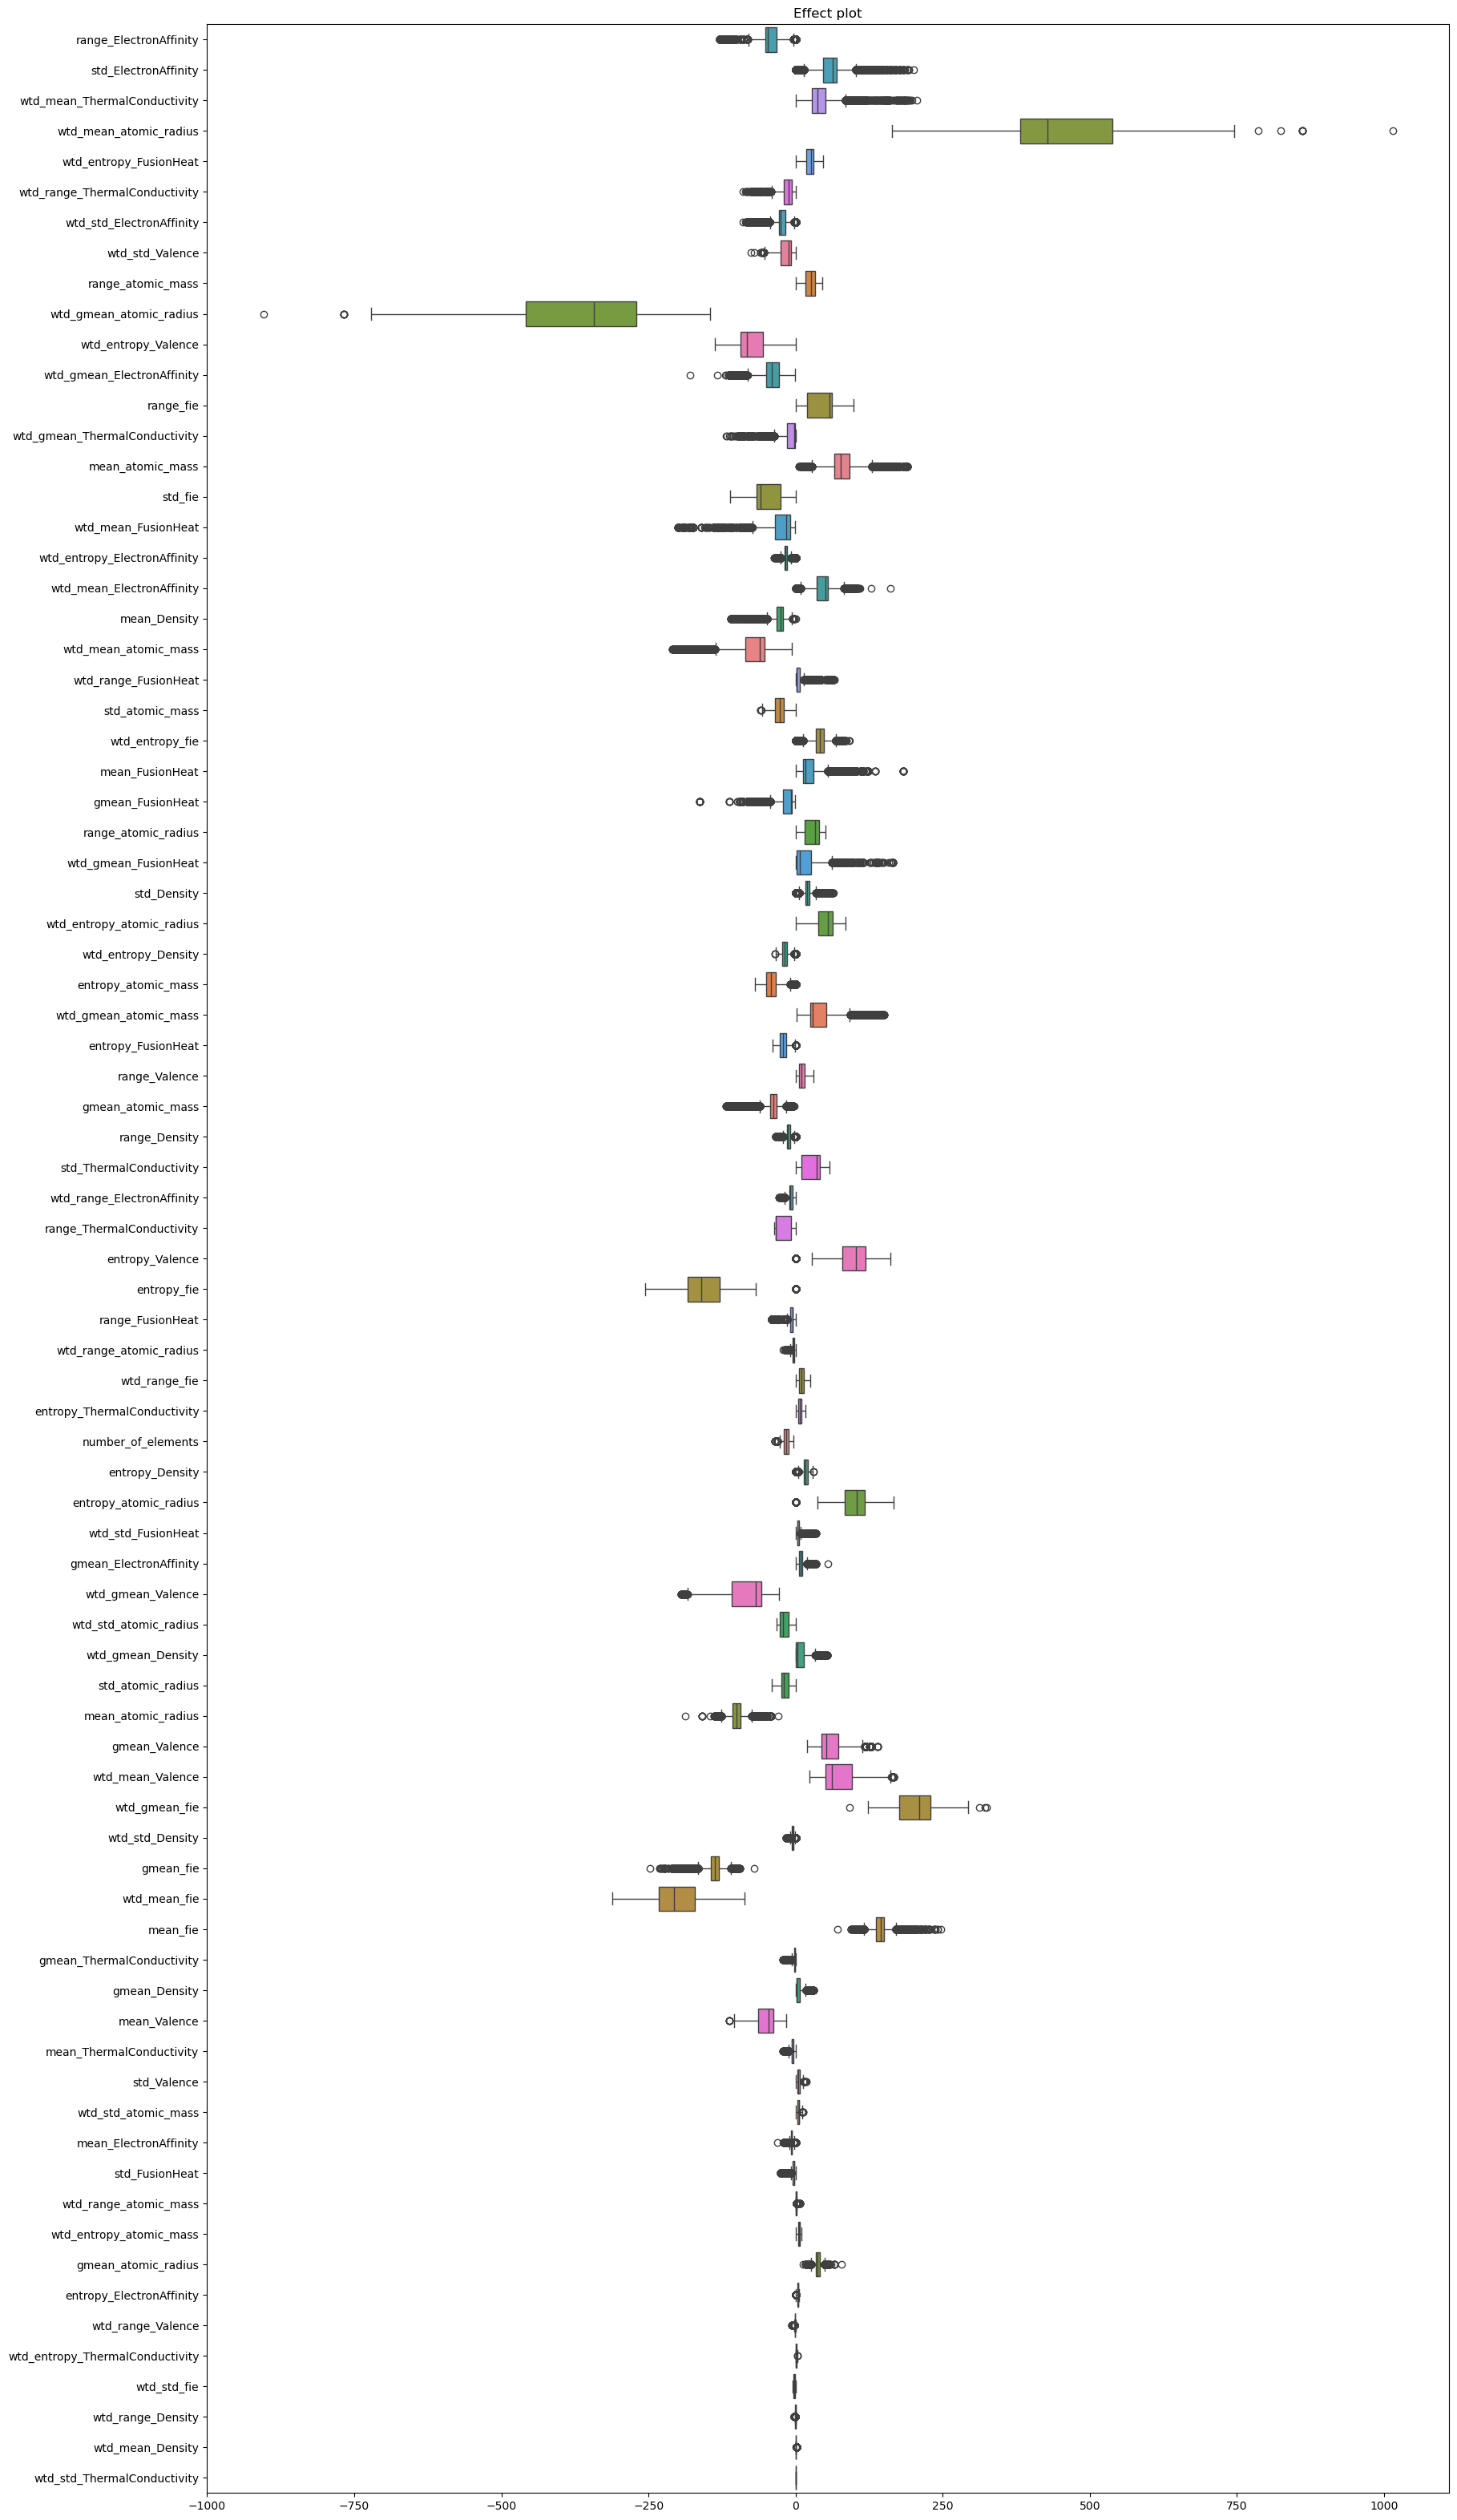

In [33]:
plt.figure(figsize=(20, 40))
sns.boxplot(df_effect, order=list(df_feature_importance_abs["Feature"]), orient="h");
plt.title("Effect plot");

* Features related to atomic radius, first ionization energy and valence (attributes, in general, related to the atomic size) apresented the highest variances. 

***

<!DOCTYPE html>
<html>
<body>
    <h3>
        <strong> 🐛Sparse Linear Models </strong>
    </h3>
</body>
</html>

Sparse models introduce sparsity into linear models, helping to reduce dimensionality and mitigate multicollinearity, which can otherwise lead to instability. In traditional OLS regression, highly correlated features often result in large coefficient estimates, making the model less reliable. So, with this objective, other types of regressions, like Lasso and Ridge, and techniques to introduce sparsity, were created.

**Least Absolute Shrinkage and Selection Operator (Lasso)**

Generally, the minimization problem that the weights optimize can be describe as:

$$ 
min_{\beta} \left(\displaystyle\frac{1}{n} \sum_{i=1}^{n}(y^{(i)} - x_i^T\beta)^2\right)
$$


In sum, Lasso performs feature selection and regularization of the selected feature weights, by adding a cost in the lost function (L1 penalty or LASSO).

$$
min_{\beta} \left(\displaystyle\frac{1}{n} \sum_{i=1}^{n}(y^{(i)} - x_i^T\beta)^2 + \lambda||\beta||_1\right)
$$

The Lasso technique incorporates the L1-norm of the feature vector, denoted as $||\beta||_1$, which penalizes large weights. Because of the L1-norm, many of the less important feature weights are driven to zero, while the remaining weights are shrunk. Additionally, the regularization strength is controlled by the parameter lambda ($\lambda$), which is typically tuned using cross-validation.

To understand the effect of the lambda in lasso, it is possible to train many models, only variating this constant. After that, it is useful to analyse the 15 most important features (determinated by the other tests with OLS) and compare them with the 15 initial most important features determined by lasso.

In [34]:
weights_feature_importance = []
weights_lasso = []
idxs_lasso = []

idxs_lasso_repeated = set()

for p_lambda in range(1, 11):
    model = sm.OLS(y_train, X_train)
    lasso= model.fit_regularized(
    alpha=p_lambda,
    refit=True,
)
    print(f"The R-squared of the model with lambda={p_lambda} is {lasso.rsquared:.4f}") 
    weights_fi = []
    for column in df_feature_importance_abs_15["Feature"].index:
        weights_fi.append(lasso.params[column])
    weights_feature_importance.append(weights_fi)


    weights_lasso_importance = []
    idxs_lasso_importance= []


    params = list(lasso.params)  
    for i in range(15):
        weight_li = max(params, key=abs)  
        index_li= params.index(weight_li) 
        idxs_lasso_repeated.add(index_li)
        weights_lasso_importance.append(weight_li)
        idxs_lasso_importance.append(index_li)
        params[index_li] = 0 

    for i in idxs_lasso_repeated:
        if i not in idxs_lasso_importance:
            idxs_lasso_importance.append(i)
            weights_lasso_importance.append(params[i])

    weights_lasso.append(weights_lasso_importance)
    idxs_lasso.append(idxs_lasso_importance)


The R-squared of the model with lambda=1 is 0.8574
The R-squared of the model with lambda=2 is 0.8558
The R-squared of the model with lambda=3 is 0.8540
The R-squared of the model with lambda=4 is 0.8507
The R-squared of the model with lambda=5 is 0.8482
The R-squared of the model with lambda=6 is 0.8363
The R-squared of the model with lambda=7 is 0.8387
The R-squared of the model with lambda=8 is 0.8444
The R-squared of the model with lambda=9 is 0.8349
The R-squared of the model with lambda=10 is 0.8393


* The best result was lambda = 0 (as expected)

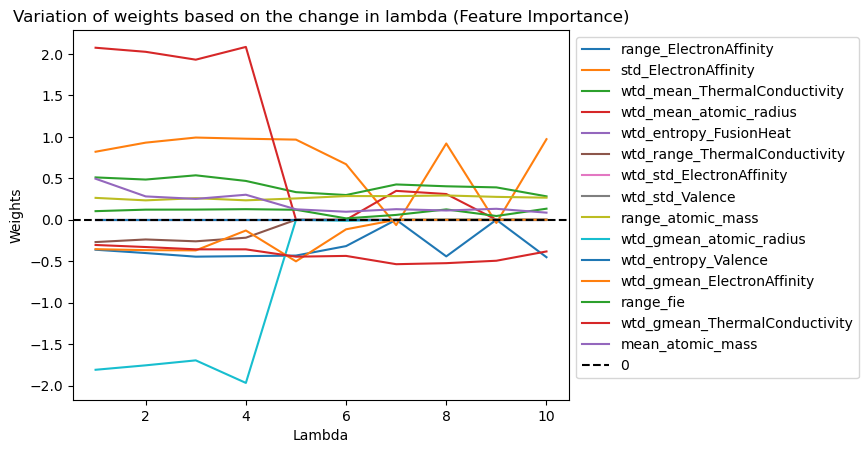

In [35]:
x = range(1,11)
plt.plot(x, [i[0] for i in weights_feature_importance], label=list(df_feature_importance_abs_15["Feature"])[0])
plt.plot(x, [i[1] for i in weights_feature_importance], label=list(df_feature_importance_abs_15["Feature"])[1])
plt.plot(x, [i[2] for i in weights_feature_importance], label=list(df_feature_importance_abs_15["Feature"])[2])
plt.plot(x, [i[3] for i in weights_feature_importance], label=list(df_feature_importance_abs_15["Feature"])[3])
plt.plot(x, [i[4] for i in weights_feature_importance], label=list(df_feature_importance_abs_15["Feature"])[4])
plt.plot(x, [i[5] for i in weights_feature_importance], label=list(df_feature_importance_abs_15["Feature"])[5])
plt.plot(x, [i[6] for i in weights_feature_importance], label=list(df_feature_importance_abs_15["Feature"])[6])
plt.plot(x, [i[7] for i in weights_feature_importance], label=list(df_feature_importance_abs_15["Feature"])[7])
plt.plot(x, [i[8] for i in weights_feature_importance], label=list(df_feature_importance_abs_15["Feature"])[8])
plt.plot(x, [i[9] for i in weights_feature_importance], label=list(df_feature_importance_abs_15["Feature"])[9])
plt.plot(x, [i[10] for i in weights_feature_importance], label=list(df_feature_importance_abs_15["Feature"])[10])
plt.plot(x, [i[11] for i in weights_feature_importance], label=list(df_feature_importance_abs_15["Feature"])[11])
plt.plot(x, [i[12] for i in weights_feature_importance], label=list(df_feature_importance_abs_15["Feature"])[12])
plt.plot(x, [i[13] for i in weights_feature_importance], label=list(df_feature_importance_abs_15["Feature"])[13])
plt.plot(x, [i[14] for i in weights_feature_importance], label=list(df_feature_importance_abs_15["Feature"])[14])

plt.axhline(0, color="black", ls="--", label="0")
plt.title("Variation of weights based on the change in lambda (Feature Importance)")
plt.xlabel("Lambda")
plt.ylabel("Weights")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));

In [36]:
lasso_weights_15 = []
lasso_idxs_15 = []

for i, j in zip(idxs_lasso, weights_lasso):
    lw15 = []  
    li15 = []  
    
    for k, l in zip(i, j):
        if k in idxs_lasso[0]:  
            li15.append(k)
            lw15.append(l)
    
    lasso_idxs_15.append(li15)  
    lasso_weights_15.append(lw15)  


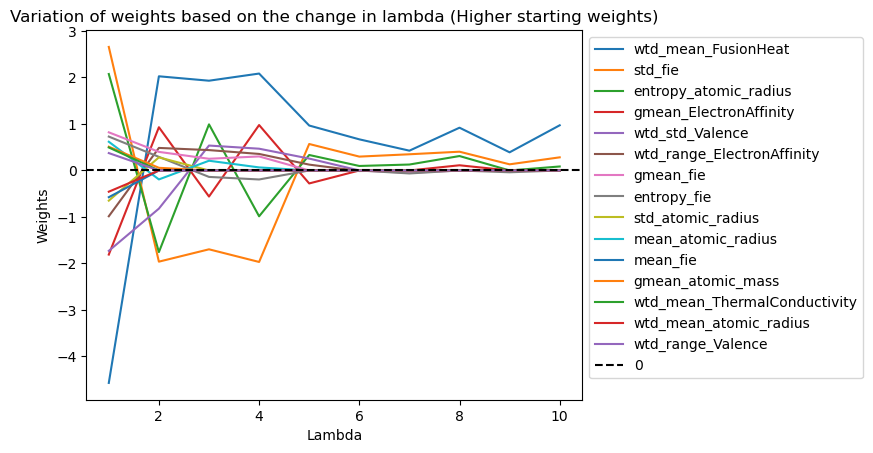

In [37]:
x = range(1,11)
plt.plot(x, [i[0] for i in lasso_weights_15], label=list(df_feature_importance["Feature"])[idxs_lasso[0][0]])
plt.plot(x, [i[1] for i in lasso_weights_15], label=list(df_feature_importance["Feature"])[idxs_lasso[0][1]])
plt.plot(x, [i[2] for i in lasso_weights_15], label=list(df_feature_importance["Feature"])[idxs_lasso[0][2]])
plt.plot(x, [i[3] for i in lasso_weights_15], label=list(df_feature_importance["Feature"])[idxs_lasso[0][3]])
plt.plot(x, [i[4] for i in lasso_weights_15], label=list(df_feature_importance["Feature"])[idxs_lasso[0][4]])
plt.plot(x, [i[5] for i in lasso_weights_15], label=list(df_feature_importance["Feature"])[idxs_lasso[0][5]])
plt.plot(x, [i[6] for i in lasso_weights_15], label=list(df_feature_importance["Feature"])[idxs_lasso[0][6]])
plt.plot(x, [i[7] for i in lasso_weights_15], label=list(df_feature_importance["Feature"])[idxs_lasso[0][7]])
plt.plot(x, [i[8] for i in lasso_weights_15], label=list(df_feature_importance["Feature"])[idxs_lasso[0][8]])
plt.plot(x, [i[9] for i in lasso_weights_15], label=list(df_feature_importance["Feature"])[idxs_lasso[0][9]])
plt.plot(x, [i[10] for i in lasso_weights_15], label=list(df_feature_importance["Feature"])[idxs_lasso[0][10]])
plt.plot(x, [i[11] for i in lasso_weights_15], label=list(df_feature_importance["Feature"])[idxs_lasso[0][11]])
plt.plot(x, [i[12] for i in lasso_weights_15], label=list(df_feature_importance["Feature"])[idxs_lasso[0][12]])
plt.plot(x, [i[13] for i in lasso_weights_15], label=list(df_feature_importance["Feature"])[idxs_lasso[0][13]])
plt.plot(x, [i[14] for i in lasso_weights_15], label=list(df_feature_importance["Feature"])[idxs_lasso[0][14]])


plt.axhline(0, color="black", ls="--", label="0")
plt.title("Variation of weights based on the change in lambda (Higher starting weights)")
plt.xlabel("Lambda")
plt.ylabel("Weights")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));

In [38]:
len(lasso.params)

81

In [39]:
count = 0
for i in idxs_lasso[0]:
    if i in list(df_feature_importance_abs_15["Feature"].index):
        count += 1
print(count)

5


In [40]:
feature_importance_lasso = np.array(lasso.params)/np.array(lasso.bse)
feature_importance_lasso = np.nan_to_num(feature_importance_lasso, nan=0)

/tmp/ipykernel_732554/1505989439.py:1: RuntimeWarning: invalid value encountered in divide
  feature_importance_lasso = np.array(lasso.params)/np.array(lasso.bse)


In [41]:
df_lasso_final_weights = pd.DataFrame({
    "Features": X_train.columns,
    "Feature Importance": feature_importance_lasso
}).sort_values(by='Feature Importance', ascending=False)

In [42]:
len(list([df_feature_importance["Feature"][i] for i in idxs_lasso[0]]))

15

In [43]:
len(list(df_feature_importance_abs_15["Feature"]))

15

* 5 features in common

In [44]:
df_common_features = pd.DataFrame({
    "Feature Importance (OLS)": list(df_feature_importance_abs_15["Feature"]),
    "Higher weights (OLS)": list(df_weights_abs_15["Feature"]),
    "Higher starting weights (LASSO)": [df_feature_importance["Feature"][i] for i in idxs_lasso[0]],
    "Final feature importance (LASSO)": list(df_lasso_final_weights["Features"][:15])
})

display(df_common_features)

Feature Importance (OLS)          Higher weights (OLS)  \
0          range_ElectronAffinity                   entropy_fie   
1            std_ElectronAffinity         entropy_atomic_radius   
2    wtd_mean_ThermalConductivity               entropy_Valence   
3          wtd_mean_atomic_radius           wtd_entropy_Valence   
4          wtd_entropy_FusionHeat               wtd_entropy_fie   
5   wtd_range_ThermalConductivity     wtd_entropy_atomic_radius   
6        wtd_std_ElectronAffinity           entropy_atomic_mass   
7                 wtd_std_Valence             wtd_gmean_Valence   
8               range_atomic_mass        wtd_entropy_FusionHeat   
9         wtd_gmean_atomic_radius               wtd_std_Valence   
10            wtd_entropy_Valence              wtd_mean_Valence   
11     wtd_gmean_ElectronAffinity  wtd_entropy_ElectronAffinity   
12                      range_fie           wtd_entropy_Density   
13  wtd_gmean_ThermalConductivity                 gmean_Valence   
14               mean_atomic_mass            entropy_FusionHeat   

   Higher starting weights (LASSO) Final feature importance (LASSO)  
0                     mean_Valence                        range_fie  
1                 wtd_mean_Valence                range_atomic_mass  
2           wtd_mean_atomic_radius             std_ElectronAffinity  
3          wtd_gmean_atomic_radius     wtd_mean_ThermalConductivity  
4                    range_Valence                         mean_fie  
5               wtd_std_FusionHeat         mean_ThermalConductivity  
6             std_ElectronAffinity              range_atomic_radius  
7             wtd_range_FusionHeat                wtd_range_Density  
8              wtd_mean_FusionHeat                 mean_atomic_mass  
9                  mean_FusionHeat                wtd_gmean_Density  
10               std_atomic_radius            mean_ElectronAffinity  
11    wtd_mean_ThermalConductivity      wtd_std_ThermalConductivity  
12                mean_atomic_mass          std_ThermalConductivity  
13            wtd_mean_atomic_mass                      std_Density  
14       wtd_mean_ElectronAffinity                     mean_Density

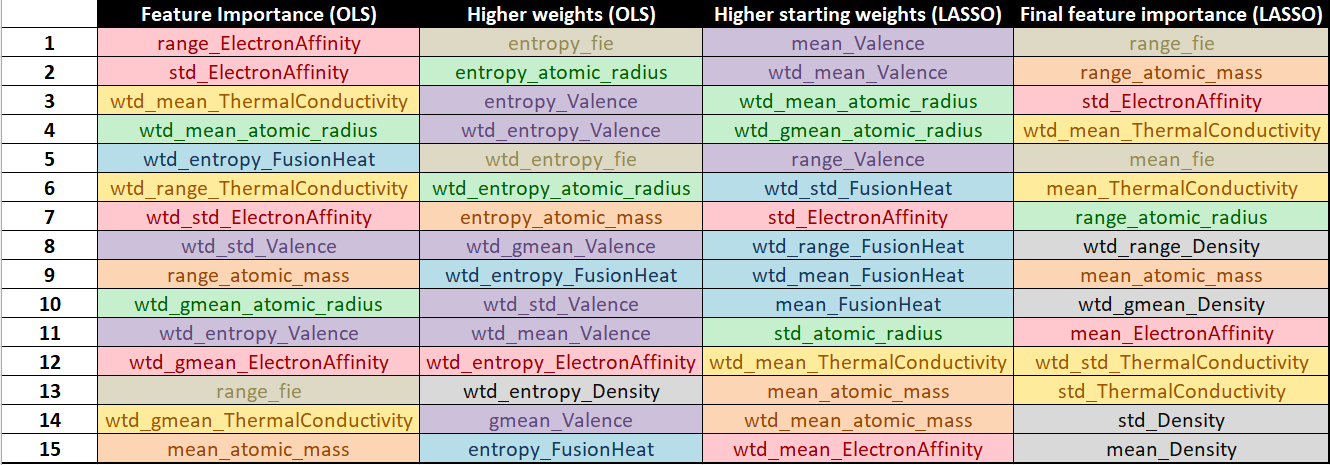

**Ridge Regression**

As Lasso Regression, Ridge uses regularization to reduce multicolinearity, by adding a penalty term (in this case L2) in the loss function.

$$
min_{\beta} \left(\displaystyle\frac{1}{n} \sum_{i=1}^{n}(y^{(i)} - x_i^T\beta)^2 + \lambda||\beta||^2\right)
$$

But different from the other model, the L2 penalty shrinks coefficients towards zero but never to absolute zero. So, Ridge cannot be consider a feature selection technique, as it retains all features while merely reducing their impact.[4]

Statsmodel (the module used to training the other models) doesn´t have a ridge implementation. So, we can use Scikit-learn to train this model. To find the optimal constraint alpha value, we can use the cross-validation, that try different combinations to define the best model.

In [45]:
r_squared_ridge = []
for p_lambda in [0.001, 0.01, 0.1, 1, 10, 50, 100, 250, 500, 750, 1000]:
    ridge= Ridge(alpha=p_lambda)
    ridge.fit(X_train,y_train)

    train_score_ridge = ridge.score(X_train, y_train)
    r_squared_ridge.append(train_score_ridge)
    print(f"The R-squared of the model with lambda={p_lambda} is {train_score_ridge:.4f}") 

The R-squared of the model with lambda=0.001 is 0.7372
The R-squared of the model with lambda=0.01 is 0.7372
The R-squared of the model with lambda=0.1 is 0.7372
The R-squared of the model with lambda=1 is 0.7369
The R-squared of the model with lambda=10 is 0.7351
The R-squared of the model with lambda=50 is 0.7322
The R-squared of the model with lambda=100 is 0.7308
The R-squared of the model with lambda=250 is 0.7286
The R-squared of the model with lambda=500 is 0.7268
The R-squared of the model with lambda=750 is 0.7257
The R-squared of the model with lambda=1000 is 0.7249


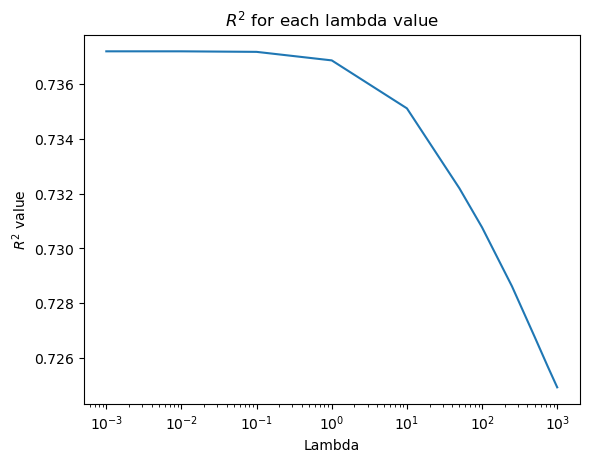

In [46]:
x = [0.001, 0.01, 0.1, 1, 10, 50, 100, 250, 500, 750, 1000]
    
plt.plot(x, r_squared_ridge)
plt.title(f"$R^2$ for each lambda value")
plt.ylabel("$R^2$ value")
plt.xscale("log")
plt.xlabel("Lambda")
plt.show();

* How expected, the model performance decreased when the lambda value increased

**Cross validation**

The Lasso and Ridge models exhibited, in conventional validations, a lower performance compared to the traditional regression model. However, these models stand out in cross-validation, which involves splitting the training data into k parts, with k-1 used for training and the remaining part for testing, providing a more robust evaluation of model performance. This approach is particularly effective for predicting unknown data, as it aims to reduce the occurrence of overfitting. Furthermore, the cross-validation methods for Lasso and Ridge, implemented in the Scikit-Learn library, can still be used to find the optimal value of lambda.

To evaluate the models, besides r squared, RMSE can be used. Root Mean Squared Error (RMSE) is a commonly used metric for evaluating model performance. It is calculated as the square root of the Mean Squared Error (MSE), which represents the average of the squared differences between the actual and predicted values.

$$
RMSE = \sqrt{MSE} = \sqrt{\sum_{i=1}^{N} \frac{(y_i - \hat{y}_i)^2}{N}},
$$

In [17]:
def rmse(y_test, y_predicted): 
    rmse_sum = 0
    for i, j in zip(y_test, y_predicted):
        rmse_sum += (j - i)**2
    return (rmse_sum / len(y_test))**(1/2)

So, let´s test!

In [48]:
lasso_cv = LassoCV(cv=10, random_state=1702).fit(X_train, y_train)
print(f"The chosen lambda was: {lasso_cv.alpha_}")
cv_lasso = cross_val_score(lasso_cv, X_train, y_train, scoring="neg_root_mean_squared_error")
print(f"The RMSE of lasso made with cross validation was {-np.mean(cv_lasso)}")

The chosen lambda was: 73.21351445329911
The RMSE of lasso made with cross validation was 21.801557622803397


In [49]:
ridge_cv = RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10, 50, 100, 250, 500, 750, 1000]).fit(X_train, y_train)
print(f"The chosen lambda was: {ridge_cv.alpha_}")
cv_ridge = cross_val_score(ridge_cv, X_train, y_train, scoring="neg_root_mean_squared_error")
print(f"The RMSE of ridge made with cross validation was {-np.mean(cv_ridge)}")

The chosen lambda was: 0.01
The RMSE of ridge made with cross validation was 17.67807296449028


In [50]:
lr_model = LinearRegression()
lr_cv = lr_model.fit(X_train, y_train)

cv_lr = cross_val_score(lr_cv, X_train, y_train, scoring="neg_root_mean_squared_error")
print(f"The RMSE of ridge made with cross validation was {-np.mean(cv_lr)}")

The RMSE of ridge made with cross validation was 17.644635960612476


* Considering the alpha value in Ridge, the RMSE result—being close to the OLS value—wasn´t the expected. On the other hand, the lambda selected for Lasso was very high, leading to worse performance (as expected!). As a result, 67 features were eliminated

***

<html>
<body>
    <h3>
        <strong> 🐙 Generalized Linear Models (GLMs) </strong>
    </h3>
</body>
</html>

**Shapiro Wilk**

Do the columns follow a normal distribution? It is possible to check this with the Shapiro-Wilk test.

In [51]:
from scipy import stats

count = 0
for column in df.columns:
    test_result = stats.shapiro(df[column])
    pvalue = test_result.pvalue

    if pvalue <= significance:
        print(f"The column '{column}' does not follow a Gaussian distribution.")
        count += 1

print(f"{count} columns do not follow a Gaussian distribution.")


The column 'number_of_elements' does not follow a Gaussian distribution.
The column 'mean_atomic_mass' does not follow a Gaussian distribution.
The column 'wtd_mean_atomic_mass' does not follow a Gaussian distribution.
The column 'gmean_atomic_mass' does not follow a Gaussian distribution.
The column 'wtd_gmean_atomic_mass' does not follow a Gaussian distribution.
The column 'entropy_atomic_mass' does not follow a Gaussian distribution.
The column 'wtd_entropy_atomic_mass' does not follow a Gaussian distribution.
The column 'range_atomic_mass' does not follow a Gaussian distribution.
The column 'wtd_range_atomic_mass' does not follow a Gaussian distribution.
The column 'std_atomic_mass' does not follow a Gaussian distribution.
The column 'wtd_std_atomic_mass' does not follow a Gaussian distribution.
The column 'mean_fie' does not follow a Gaussian distribution.
The column 'wtd_mean_fie' does not follow a Gaussian distribution.
The column 'gmean_fie' does not follow a Gaussian distribut

/home/julia24002/anaconda3/envs/ilumpy/lib/python3.9/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [52]:
stats.expon.fit(df["critical_temp"])

(0.00021, 34.421009135352485)

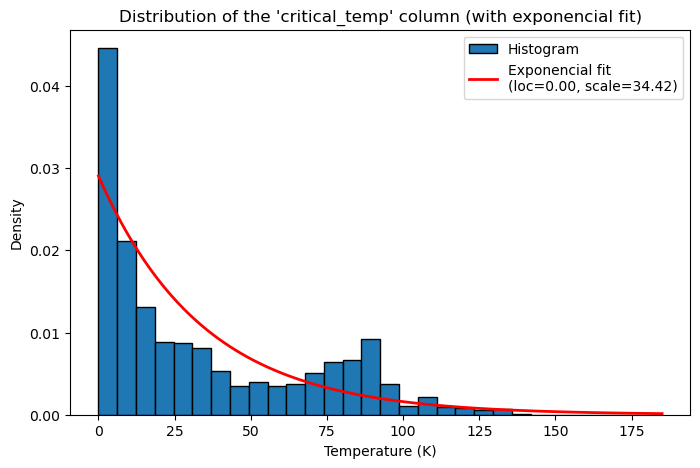

In [53]:
loc, scale = stats.expon.fit(df["critical_temp"])

x = np.linspace(min(df["critical_temp"]), max(df["critical_temp"]), 100)


pdf_fitted = stats.expon.pdf(x, loc=loc, scale=scale) 

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.hist(df["critical_temp"], density=True, bins=30, edgecolor='black', label="Histogram") # the total area of histogram is equal to 1

ax.plot(x, pdf_fitted, 'r-', lw=2, label=f"Exponencial fit\n(loc={loc:.2f}, scale={scale:.2f})")

ax.set_title("Distribution of the 'critical_temp' column (with exponencial fit)")
ax.set_xlabel("Temperature (K)")
ax.set_ylabel("Density")
ax.legend()

plt.show()


They don't! One of the key assumptions of traditional linear regression is that the target variable follows a Gaussian distribution. However, as seen in the distribution plot of the 'critical temp' column, this assumption does not hold: the target distribution follows a Exponential distribution (this make sense: besides the distribution format, the critical temperature is a continual variable that can only assume positive values). In this case, a Generalized Linear Model (GLM) can be a good alternative to properly evaluate the regression's performance.

**Generalized Linear Models (GMs)**

GMs are useful for non-linear outcomes, preserving the weighted sum of features while allowing non-Gaussian outcome distributions. These models establish a connection between the expected mean of the distribution and the weighted sum through a potentially nonlinear function

$$
g(E_y(y|x)) = \beta_0 + \beta_1 x_1 + \cdots + \beta_n x_n + \epsilon
$$

where:
* $g()$: link function
* $E_y$: probability distribution from the exponential family (distributions with parameterized formula that includes a exponential, mean/variance of the distribution, etc)

We know that the target distribution belongs to the exponential family. The closest distribution available in Statsmodels is Gamma, which encompasses the exponential distribution. Consequently, we use the logarithm as the link function, as it cancels out the exponential distribution, enhancing interpretability. Typically, the logarithm of the feature is incremented by one, and the prediction is adjusted according to the corresponding weight.

In [54]:
link_function = sm.families.links.Log()

distribuition = sm.families.Gamma(link=link_function)

model_glm = sm.GLM(y_train, X_train, family=distribuition)

glm = model_glm.fit()

print(glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          critical_temp   No. Observations:                19137
Model:                            GLM   Df Residuals:                    19056
Model Family:                   Gamma   Df Model:                           80
Link Function:                    Log   Scale:                         0.43001
Method:                          IRLS   Log-Likelihood:                -73749.
Date:                Thu, 27 Feb 2025   Deviance:                       9619.3
Time:                        13:37:02   Pearson chi2:                 8.19e+03
No. Iterations:                    52   Pseudo R-squ. (CS):             0.9232
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
number_of_

In [55]:
y_predicted_glm = glm.predict(X_test)

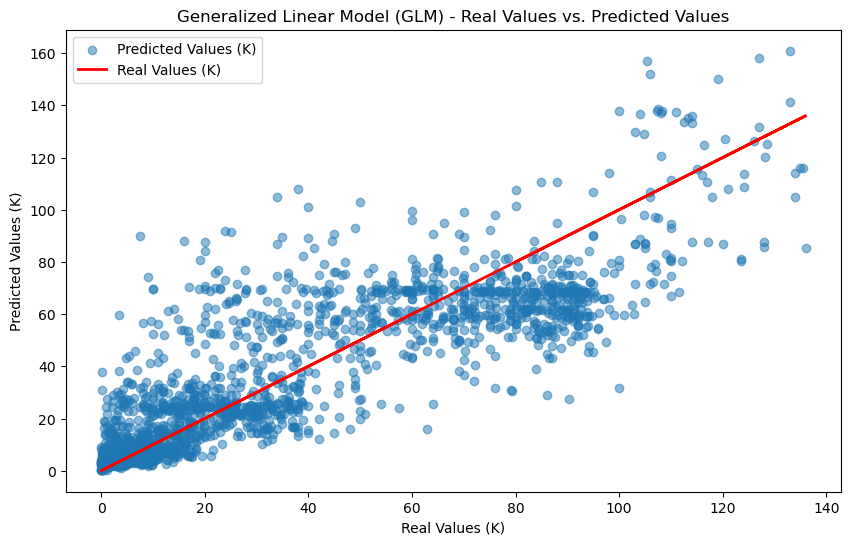

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predicted_glm, alpha=0.5, label='Predicted Values (K)')

plt.plot(y_test, y_test, color='red', label='Real Values (K)', linewidth=2)

plt.title('Generalized Linear Model (GLM) - Real Values vs. Predicted Values')
plt.xlabel('Real Values (K)')
plt.ylabel('Predicted Values (K)')
plt.legend()
plt.show()

In [57]:
print(f"The R-squared of the model is {glm.pseudo_rsquared():.4f}") 

The R-squared of the model is 0.9232


**Comparing RMSE**

In [58]:
rmse_glm = rmse(y_test, y_predicted_glm)
rmse_ols = rmse(y_test, y_predicted)
print(f"The RMSE of OlS model is {rmse_ols} \nThe RMSE of GLM model is {rmse_glm}")

The RMSE of OlS model is 17.419480265527774 
The RMSE of GLM model is 17.131652003533247


* The lower the RMSE, the better. So here, RMSE and R squared indicate that GLM is probably a better method for the dataset.

**Feature Importance**

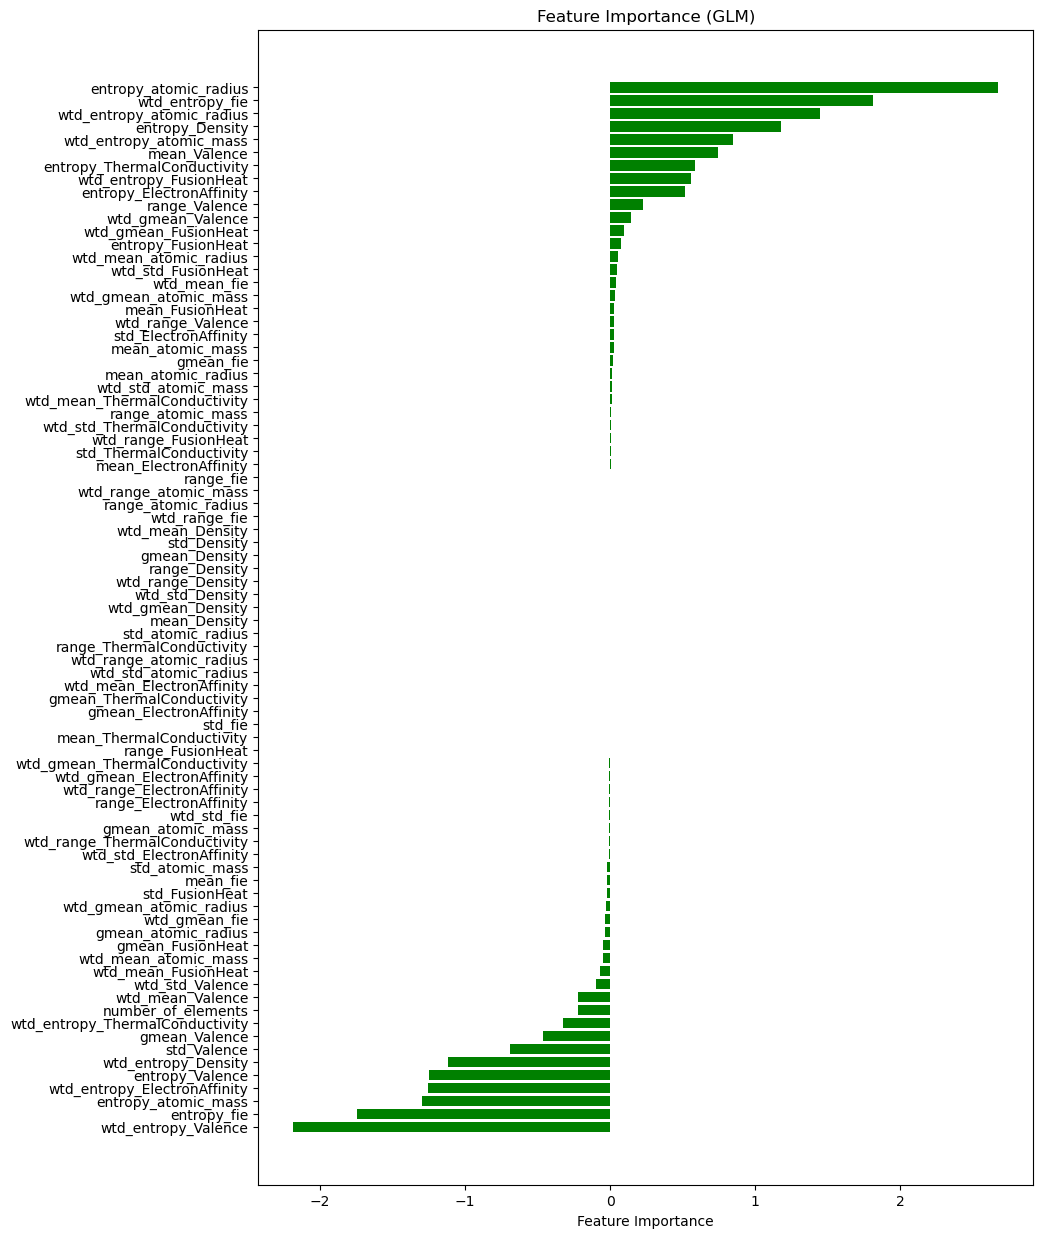

In [59]:
df_glm = pd.DataFrame({
    'Feature': glm.params.index,
    'Feature Importance': np.array(glm.params)
})

df_glm = df_glm.sort_values(by='Feature Importance', ascending=False)

plt.figure(figsize=(10, 15))
plt.barh(df_glm['Feature'], df_glm['Feature Importance'], color="green")
plt.xlabel('Feature Importance')
plt.title('Feature Importance (GLM)')
plt.gca().invert_yaxis() 
plt.show()

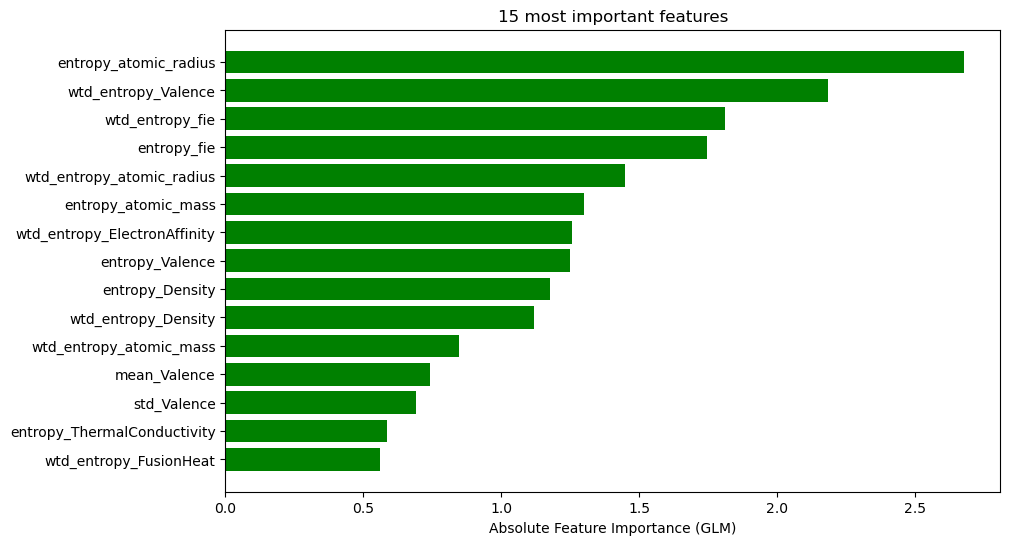

In [60]:
df_glm_abs = pd.DataFrame({
    'Feature': glm.params.index,
    'Feature Importance': np.array(abs(glm.params))
})

df_glm_abs = df_glm_abs.sort_values(by='Feature Importance', ascending=False)
df_glm_abs_15 = df_glm_abs[:15]


plt.figure(figsize=(10, 6))
plt.barh(df_glm_abs_15['Feature'], df_glm_abs_15['Feature Importance'], color="green")
plt.xlabel('Absolute Feature Importance (GLM)')
plt.title('15 most important features')
plt.gca().invert_yaxis() 
plt.show()

* Unlike the OLS model, the GLM highlights Density and Fusion Heat as key predictors. Additionally, Valence and First Ionization Energy (FIE) show an increased influence, while Electron Affinity and Atomic Radius remain significant to the model.

**Generalized Additive Models**

It´s a variation of GLMs that allows the models to learn non-linear relationships, by considering that the outcome can be modeled using a a sum of arbitrary functions of each feature (learned by spline functions).

$$
g(E_y(y|x)) = \beta_0 + \beta_1 f(x_1) + \cdots + \beta_n f(x_n) + \epsilon
$$

Here, we can use the PyGam module, which is suitable for this type of model. In addition to the link function and distribution, some arguments are:
* $l()$: linear terms
* $s()$: spline terms, which fit a flexible function to capture the relationship between a single variable and the target. This allows the relationship to be nonlinear, but independent of the other variables.
* $f()$: factor (categorical) terms 
* $te()$: tensor product, which fit a flexible surface to capture the joint relationship between two variables and the target. This is useful when the effect of one variable on the target depends on the other variable.
  
One of the main challenges with this type of model is determining which parameters to use. Before applying a GAM, it is essential to understand the types of interactions present in the dataset. To achieve this, we can analyze the relationship between each feature and the target using a simple scatter plot. This helps identify features that do not follow a linear relationship with the target.
To confirm this, we can then calculate the Pearson correlation coefficient between the feature and the target. A low correlation value may indicate a nonlinear relationship.

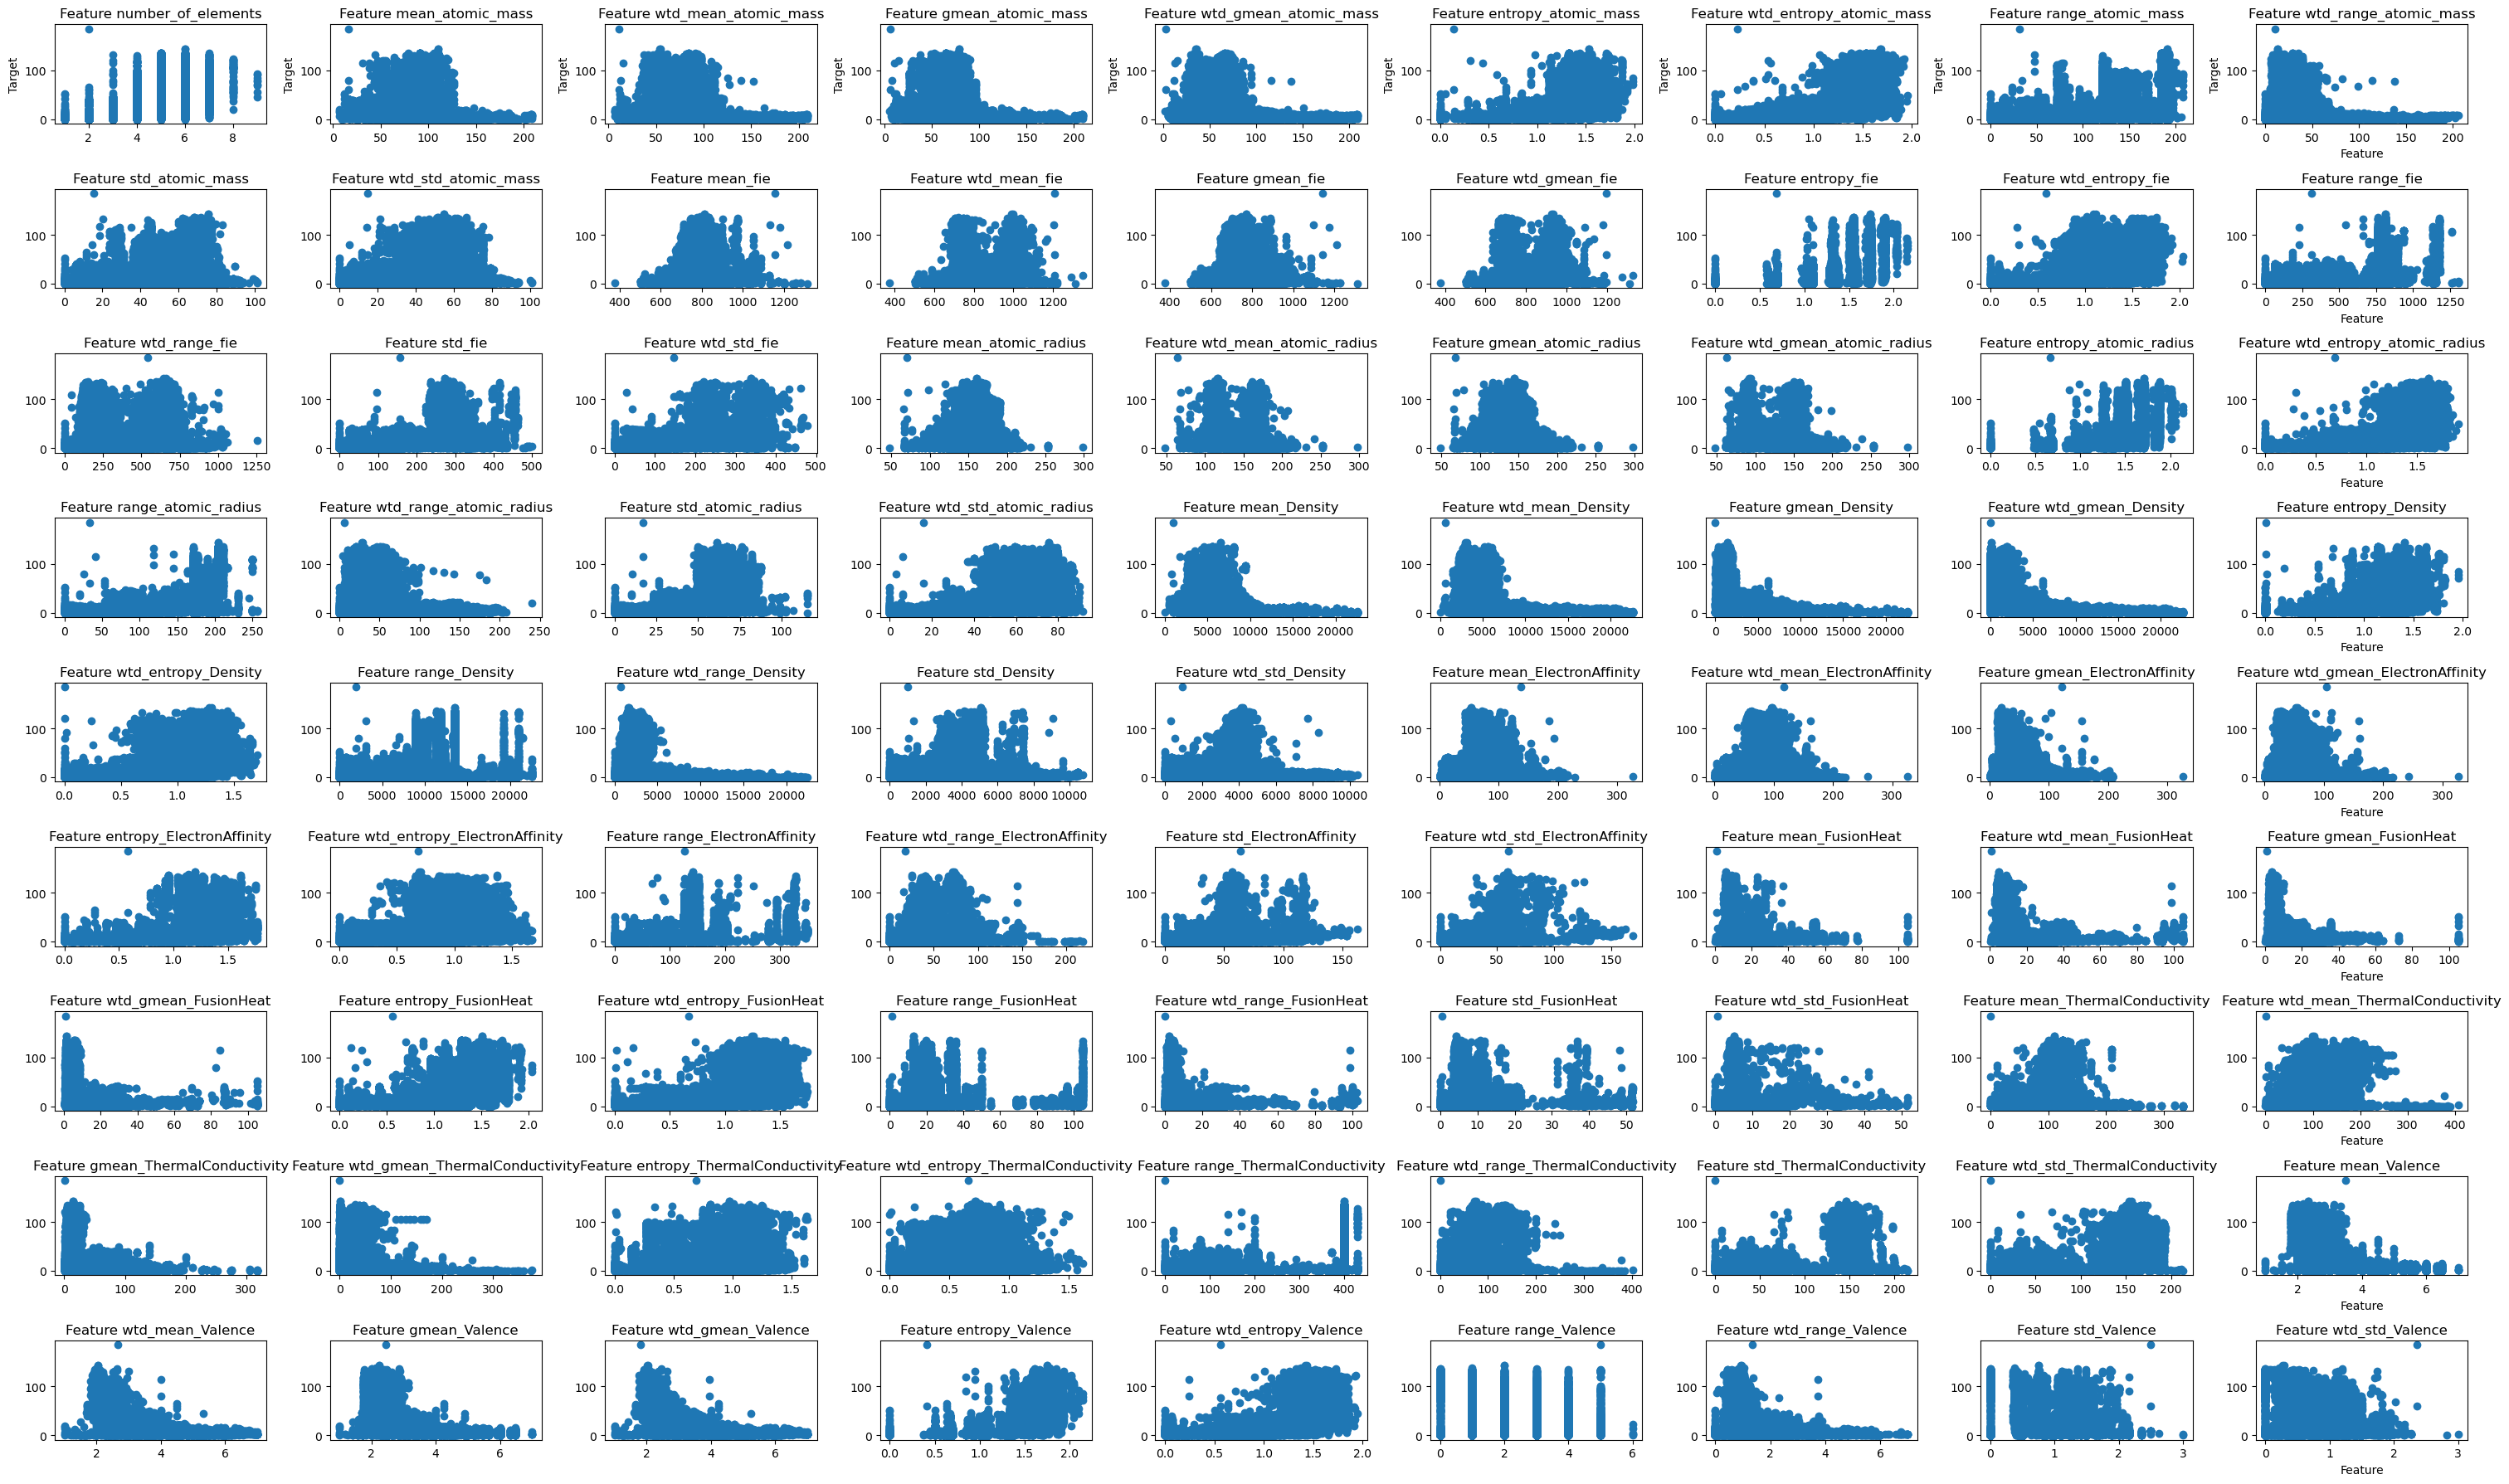

In [7]:
fig, axs = plt.subplots(9, 9, figsize=(30, 18))
count = 0 

for feature in X_train.columns:
    col = count // 9  
    row = count % 9   

    axs[col, row].scatter(X_train[feature], y_train)  
    axs[col, row].set_title(f"Feature {feature}")

    if col == 0:
        axs[col, row].set_ylabel("Target")
    if row == 8:  
        axs[col, row].set_xlabel("Feature")

    count += 1
    if count >= len(X_train.columns): 
        break

plt.tight_layout()
plt.show()



* The features derived from the first ionization energy (FIE) and atomic radius exhibit similar distributions, suggesting a potential relationship that could be further investigated. Additionally, some entropy-related features display a similar pattern as well.

In [10]:
fie_and_atomic_radius = [
    'mean_fie', 'wtd_mean_fie', 'gmean_fie', 'wtd_gmean_fie', 
    'entropy_fie', 'wtd_entropy_fie', 'range_fie', 'wtd_range_fie', 
    'std_fie', 'wtd_std_fie', 'mean_atomic_radius', 'wtd_mean_atomic_radius', 
    'gmean_atomic_radius', 'wtd_gmean_atomic_radius', 'entropy_atomic_radius', 
    'wtd_entropy_atomic_radius', 'range_atomic_radius', 'wtd_range_atomic_radius', 
    'std_atomic_radius', 'wtd_std_atomic_radius'
]

df_fie_and_atomic_radius= df[fie_and_atomic_radius].copy()
df_fie_and_atomic_radius.corr().mean()

mean_fie                     0.178088
wtd_mean_fie                 0.329942
gmean_fie                    0.090498
wtd_gmean_fie                0.301293
entropy_fie                  0.392385
wtd_entropy_fie              0.271987
range_fie                    0.427150
wtd_range_fie                0.234568
std_fie                      0.410048
wtd_std_fie                  0.415510
mean_atomic_radius           0.022125
wtd_mean_atomic_radius      -0.231559
gmean_atomic_radius         -0.137493
wtd_gmean_atomic_radius     -0.293394
entropy_atomic_radius        0.382541
wtd_entropy_atomic_radius    0.390640
range_atomic_radius          0.423112
wtd_range_atomic_radius     -0.170315
std_atomic_radius            0.395134
wtd_std_atomic_radius        0.411050
dtype: float64

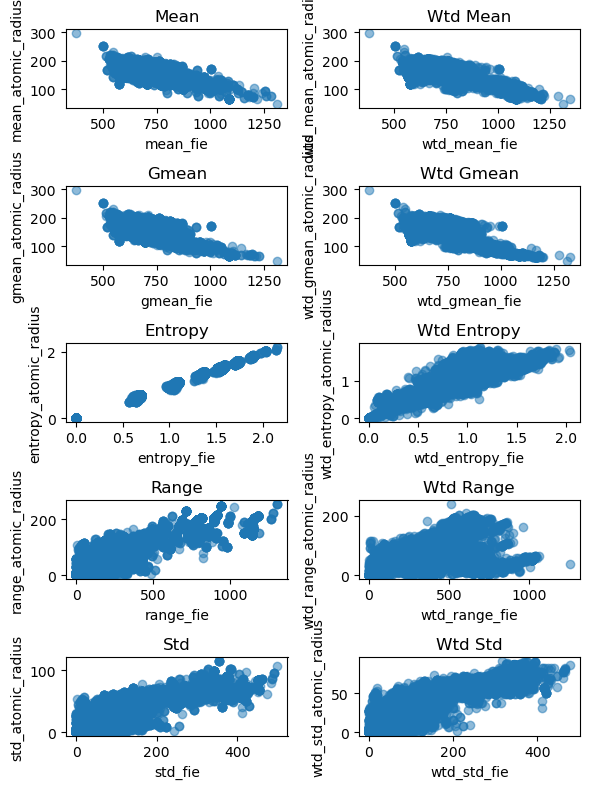

In [9]:
operation = ["Mean", "Wtd Mean", "Gmean", "Wtd Gmean", 
             "Entropy", "Wtd Entropy", "Range", "Wtd Range", 
             "Std", "Wtd Std"]

fig, axs = plt.subplots(5, 2, figsize=(6, 8)) 

for idx in range(10):
    column_1 = fie_and_atomic_radius[idx]
    column_2 = fie_and_atomic_radius[idx + 10]
    
    row = idx // 2  
    col = idx % 2   

    axs[row, col].scatter(X_train[column_1], X_train[column_2], alpha=0.5)
    axs[row, col].set_title(operation[idx])
    axs[row, col].set_xlabel(column_1)
    axs[row, col].set_ylabel(column_2)

plt.tight_layout()
plt.show()


Identifying the relationships between features and the target variable can be difficulty, especially in datasets with many variables. Fortunately, the PyGAM module offers a helpful function: gridsearch. This function automatically tunes the smoothing parameters, making it easier to uncover the most significant relationships within the data.

In [64]:
# gam = GAM(distribution='gamma', link='log')
# gam.gridsearch(np.array(X_train), np.array(y_train))

  9% (1 of 11) |##                       | Elapsed Time: 0:05:15 ETA:   0:52:31

did not converge


 18% (2 of 11) |####                     | Elapsed Time: 0:10:27 ETA:   0:47:03

did not converge


 27% (3 of 11) |######                   | Elapsed Time: 0:15:39 ETA:   0:41:45

did not converge


 36% (4 of 11) |#########                | Elapsed Time: 0:20:59 ETA:   0:36:43

did not converge


 45% (5 of 11) |###########              | Elapsed Time: 0:26:12 ETA:   0:31:27

did not converge


 54% (6 of 11) |#############            | Elapsed Time: 0:31:24 ETA:   0:26:10

did not converge


 63% (7 of 11) |###############          | Elapsed Time: 0:36:39 ETA:   0:20:56

did not converge


 72% (8 of 11) |##################       | Elapsed Time: 0:41:54 ETA:   0:15:43

did not converge


 81% (9 of 11) |####################     | Elapsed Time: 0:47:11 ETA:   0:10:29

did not converge


 90% (10 of 11) |#####################   | Elapsed Time: 0:52:32 ETA:   0:05:15

did not converge


100% (11 of 11) |########################| Elapsed Time: 0:54:27 Time:  0:54:27


GAM(callbacks=[Deviance(), Diffs()], distribution=GammaDist(), 
   fit_intercept=True, link=LogLink(), max_iter=100, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + s(19) + s(20) + s(21) + s(22) + s(23) + s(24) + s(25) + s(26) + s(27) + s(28) + s(29) + s(30) + s(31) + s(32) + s(33) + s(34) + s(35) + s(36) + s(37) + s(38) + s(39) + s(40) + s(41) + s(42) + s(43) + s(44) + s(45) + s(46) + s(47) + s(48) + s(49) + s(50) + s(51) + s(52) + s(53) + s(54) + s(55) + s(56) + s(57) + s(58) + s(59) + s(60) + s(61) + s(62) + s(63) + s(64) + s(65) + s(66) + s(67) + s(68) + s(69) + s(70) + s(71) + s(72) + s(73) + s(74) + s(75) + s(76) + s(77) + s(78) + s(79) + s(80) + intercept,
   tol=0.0001, verbose=False)

***

Just saving the model :)

In [11]:
import pickle

In [184]:
with open("gam_model.pkl", "wb") as model:
    pickle.dump(gam, model)
    model.close()

In [12]:
with open ("gam_model.pkl", "rb") as model:
    gam = pickle.load(model)

***

In [143]:
gam.get_params()

{'max_iter': 100,
 'tol': 0.0001,
 'distribution': GammaDist(),
 'link': LogLink(),
 'callbacks': [Deviance(), Diffs()],
 'verbose': False,
 'terms': s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + s(19) + s(20) + s(21) + s(22) + s(23) + s(24) + s(25) + s(26) + s(27) + s(28) + s(29) + s(30) + s(31) + s(32) + s(33) + s(34) + s(35) + s(36) + s(37) + s(38) + s(39) + s(40) + s(41) + s(42) + s(43) + s(44) + s(45) + s(46) + s(47) + s(48) + s(49) + s(50) + s(51) + s(52) + s(53) + s(54) + s(55) + s(56) + s(57) + s(58) + s(59) + s(60) + s(61) + s(62) + s(63) + s(64) + s(65) + s(66) + s(67) + s(68) + s(69) + s(70) + s(71) + s(72) + s(73) + s(74) + s(75) + s(76) + s(77) + s(78) + s(79) + s(80) + intercept,
 'fit_intercept': True}

* All the features received a smoothing with spline!

Let´s discover the model performance!

In [15]:
y_predicted_gam = gam.predict(X_test)

In [18]:
print(f"The RMSE of GAM model is {rmse(y_test, y_predicted_gam)}")

The RMSE of GAM model is 14.330436823026986


In [158]:
print(f"The RMSE of GAM model is {gam.score(X_train, y_train)}")

The RMSE of GAM model is 0.847002108528996


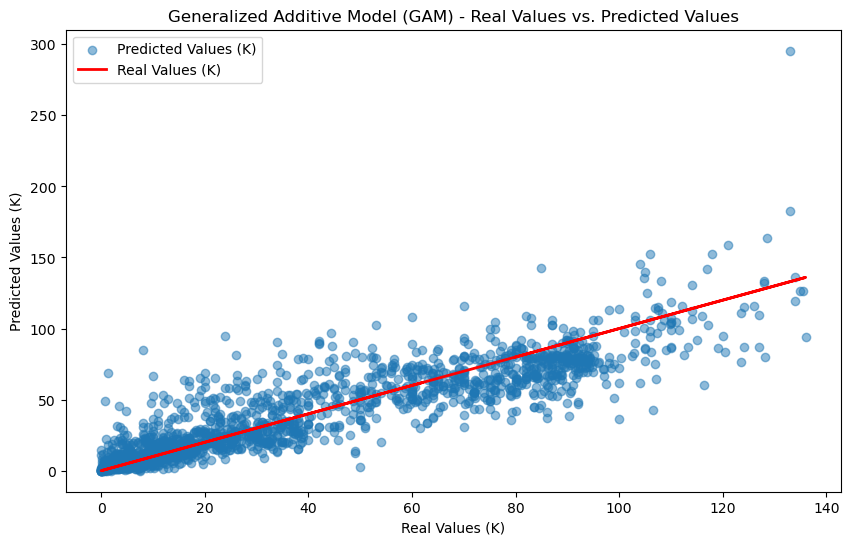

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predicted_gam, alpha=0.5, label='Predicted Values (K)')

plt.plot(y_test, y_test, color='red', label='Real Values (K)', linewidth=2)

plt.title('Generalized Additive Model (GAM) - Real Values vs. Predicted Values')
plt.xlabel('Real Values (K)')
plt.ylabel('Predicted Values (K)')
plt.legend()
plt.show()

* The RMSE is lower than OLS model, but the $R^2$ is lower. From the residual plot, we observe that the residuals are more evenly distributed, suggesting improved homoscedasticity. On the other hand, higher real values exhibit greater errors, with a notable outlier around 300K.

In [24]:
gam.deviance_residuals(X_train, y_train)

array([-0.40573467, -3.22899332, -0.10894455, ...,  0.65389741,
       -0.0764123 ,  0.03452321])

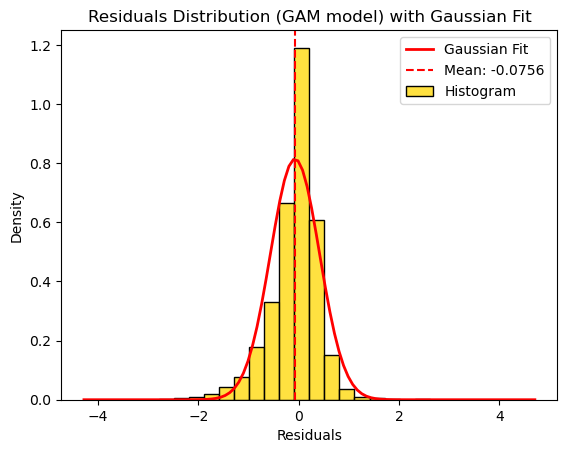

In [27]:
eixo = sns.histplot(gam.deviance_residuals(X_train, y_train), color='gold', stat="density", bins=30, label="Histogram")

mean = np.mean(gam.deviance_residuals(X_train, y_train))
std_dev = np.std(gam.deviance_residuals(X_train, y_train), ddof=1) 

x = np.linspace(min(gam.deviance_residuals(X_train, y_train)), max(gam.deviance_residuals(X_train, y_train)), 100)

pdf_fitted = stats.norm.pdf(x, loc=mean, scale=std_dev)

plt.plot(x, pdf_fitted, 'r-', lw=2, label="Gaussian Fit")

plt.axvline(mean, color='r', linestyle='dashed', label=f'Mean: {round(mean, 4)}')

plt.legend()
plt.title("Residuals Distribution (GAM model) with Gaussian Fit")
plt.xlabel("Residuals")
plt.ylabel("Density")

plt.show()

* However, apart from the outlier, the residuals, as expected, follow a normal distribution, with mean close to 0.

To see how the outcome depends on each feature, it is possible to do a partial dependence plot.

In [29]:
coef_gam = gam.coef_
print(coef_gam)

[ 97.79885872  80.48411452  63.4104944  ... -11.46913514  -2.25493354
  -5.16569633]


In [33]:
confidence_intervals_gam = gam.confidence_intervals(X_train)
print(confidence_intervals_gam)

[[  0.99979385   1.56678051]
 [  6.10762564  10.40735719]
 [ 95.29002887 113.31732899]
 ...
 [ 38.62731881  52.86480048]
 [  5.72972978   8.87525298]
 [  0.77546007   1.67644629]]


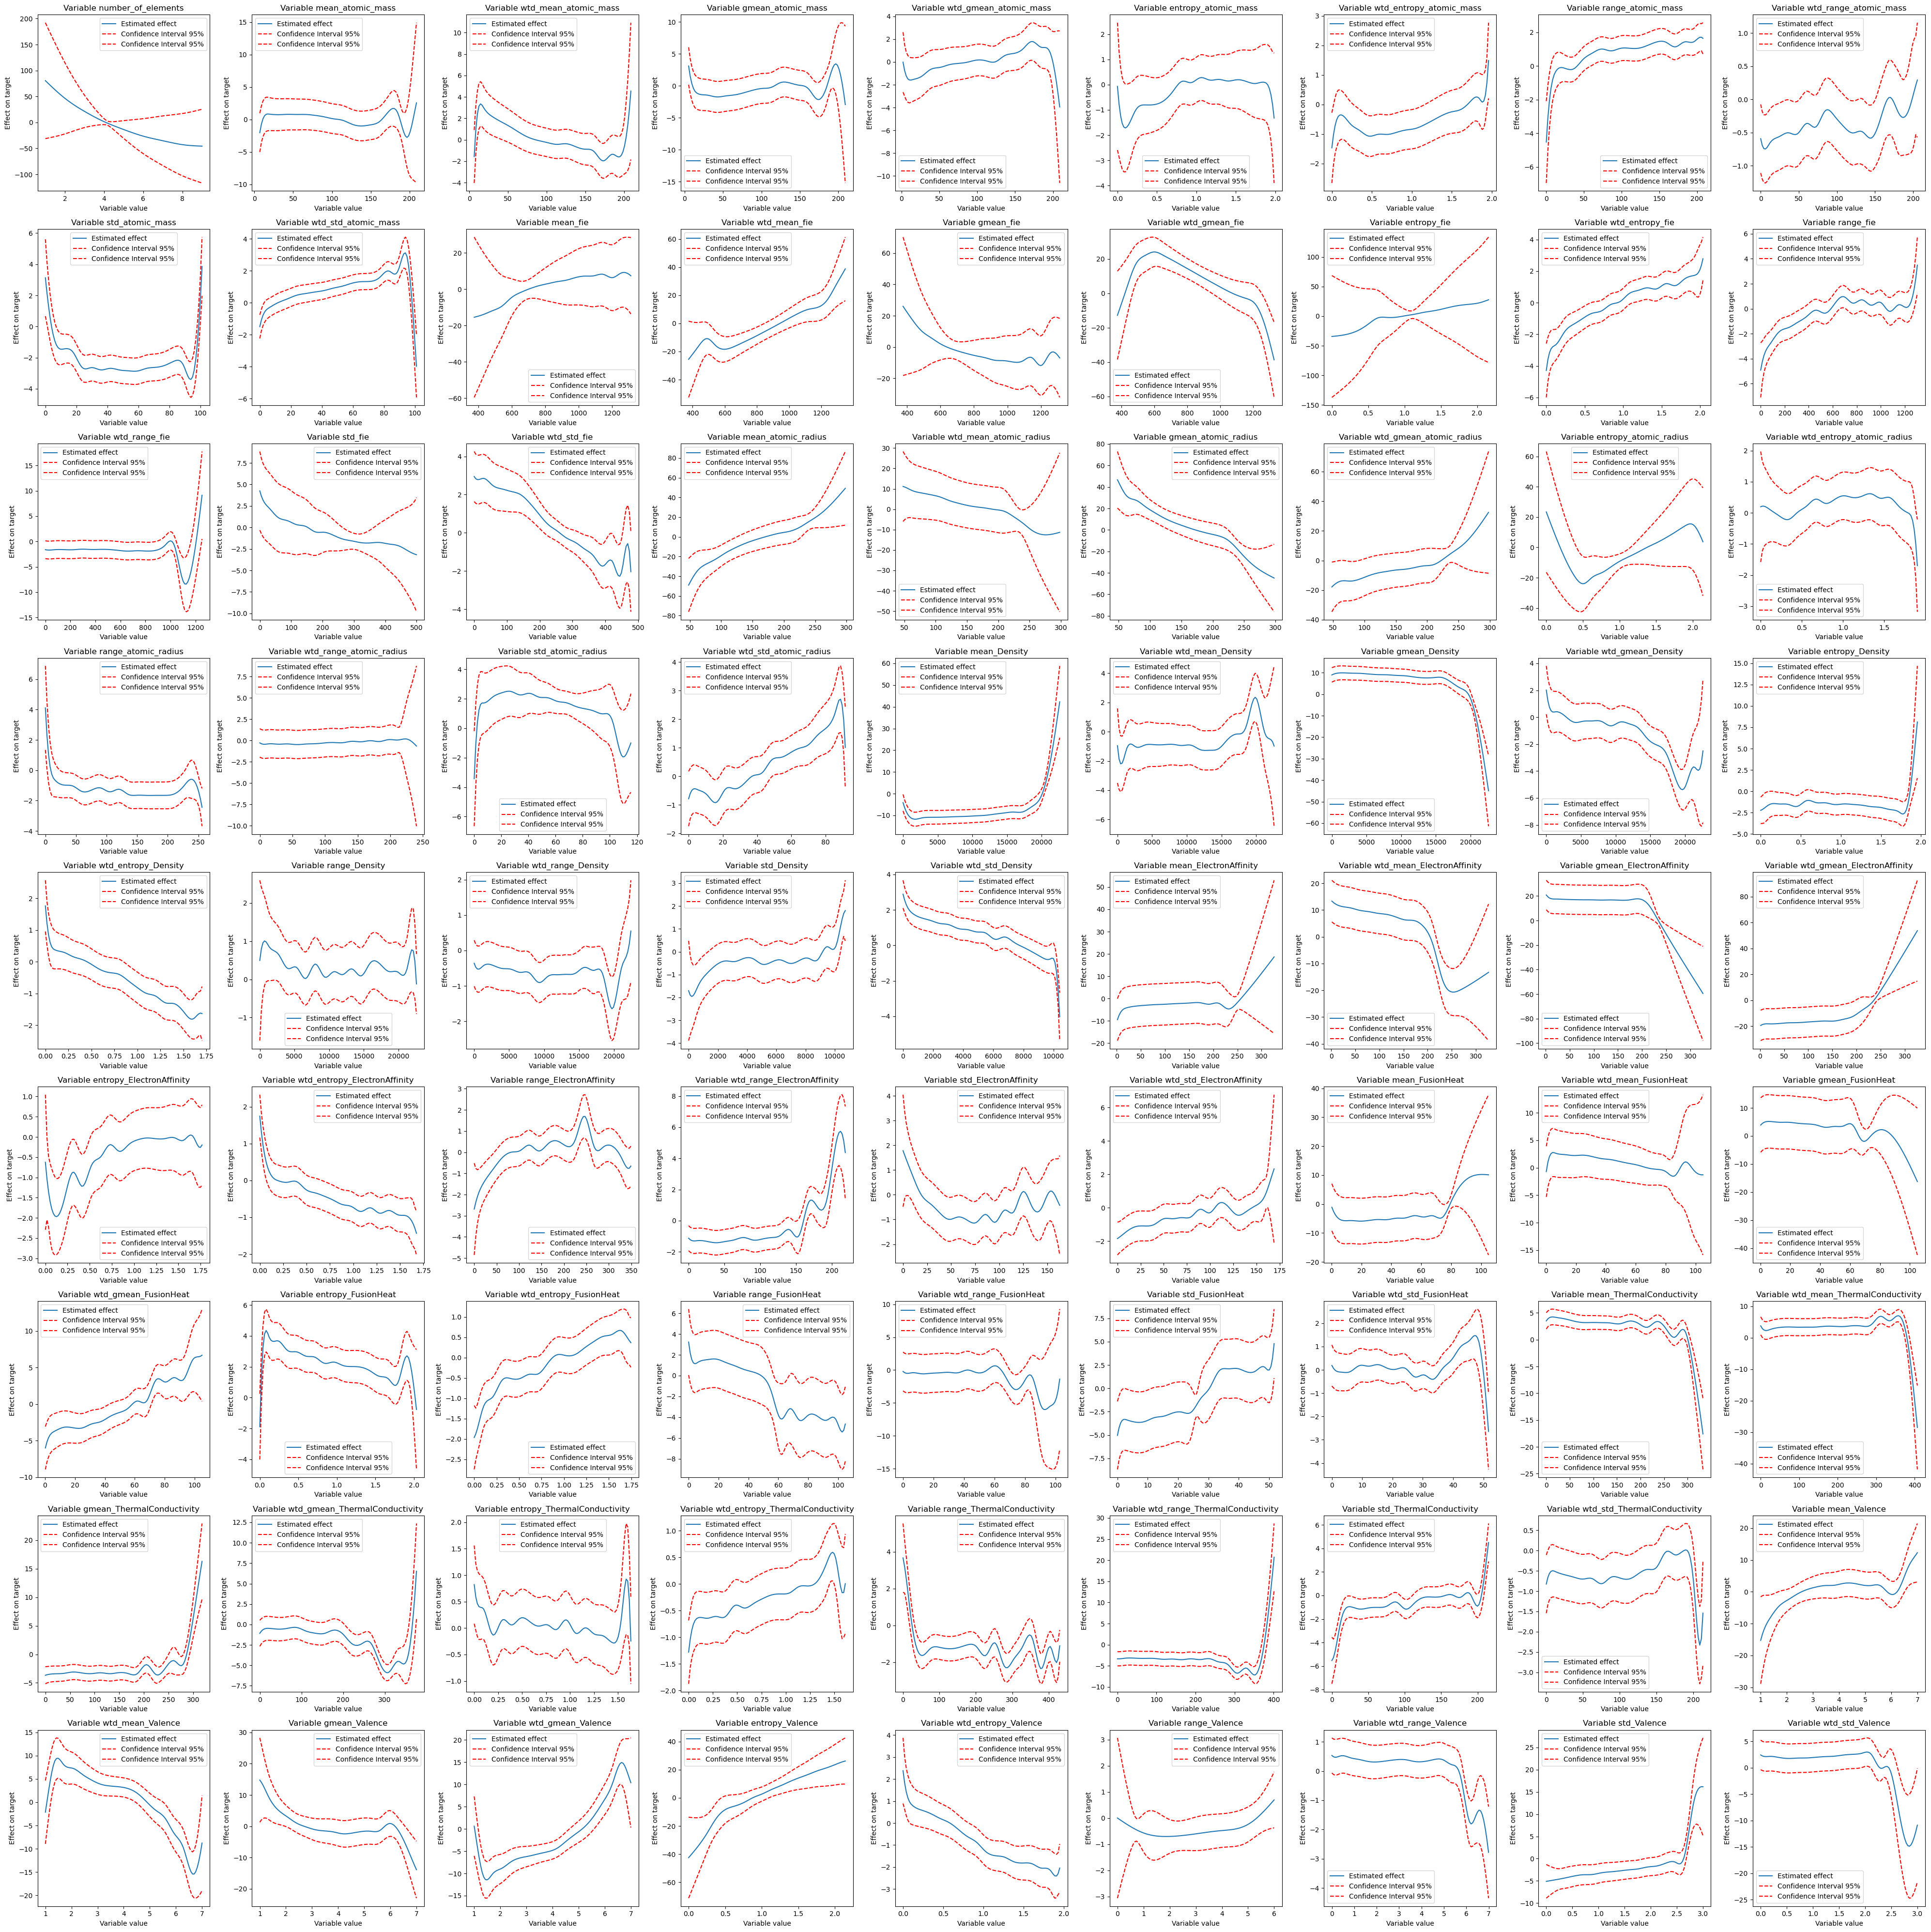

In [54]:
num_vars = 81  

fig, axs = plt.subplots(9, 9, figsize=(40, 40))  
axs = axs.flatten() 

for i in range(num_vars):
    XX = gam.generate_X_grid(term=i)  
    
    y_partial = gam.partial_dependence(term=i, X=XX)
    y_conf = gam.partial_dependence(term=i, X=XX, width=.95)[1]  

    axs[i].plot(XX[:, i], y_partial, label="Estimated effect")
    axs[i].plot(XX[:, i], y_conf, c='r', ls='--', label="Confidence Interval 95%")
    
    axs[i].set_title(f"Variable {X_train.columns[i]}")
    axs[i].set_xlabel("Variable value")
    axs[i].set_ylabel("Effect on target")
    axs[i].legend()

plt.tight_layout()
plt.show()


* Analysing the results, it´s possible to see that the major part of the features don´t have a linear influence on the target (justifiying the use of GAM). Moreover, some features related to atomic radius, valence and first energy of ionization apresented the highest effects on target (i.e most important features)

***

<!DOCTYPE html>
<html>
<body>
    <h3>
        <strong>🗃️ References</strong>
    </h3>
</body>
</html>

[1] Molnar, Christoph. Interpretable Machine Learning. christophm.github.io, https://christophm.github.io/interpretable-ml-book/.

[2] Numeracy, Maths and Statistics - Academic Skills Kit. https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html. Acesso em 17 de fevereiro de 2025.

[3] What Is Ridge Regression? | IBM. 21 de setembro de 2023, https://www.ibm.com/think/topics/ridge-regression.

[4] “Exponential Family”. Wikipedia, 27 de janeiro de 2025. Wikipedia, https://en.wikipedia.org/w/index.php?title=Exponential_family&oldid=1272267536.

[5] scipy.stats.expon — SciPy v1.15.2 Manual. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html. Acesso em 21 de fevereiro de 2025.

[6] Josef Perktold, et al. statsmodels/statsmodels: Release 0.14.2. Zenodo, 17 de abril de 2024. DOI.org (Datacite), https://doi.org/10.5281/ZENODO.593847.

[8] https://stats.stackexchange.com/questions/36064/calculating-r-squared-coefficient-of-determination-with-centered-vs-un-center/37442#37442

[9] SPSS Statistics Subscription - Classic. 30 de setembro de 2024, https://www.ibm.com/docs/fi/spss-statistics/saas?topic=statistics-generalized-linear-models.

[10] “Generalized Additive Model in Python”. GeeksforGeeks, 10 de junho de 2024, https://www.geeksforgeeks.org/generalized-additive-model-in-python/.

[11] A Tour of pyGAM — pyGAM documentation. https://pygam.readthedocs.io/en/latest/notebooks/tour_of_pygam.html. Acesso em 27 de fevereiro de 2025.

[12] LogisticGAM — pyGAM documentation. https://pygam.readthedocs.io/en/latest/api/logisticgam.html. Acesso em 28 de fevereiro de 2025.